In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [40]:
# ◊ß◊®◊ô◊ê◊™ ◊î◊ß◊ï◊ë◊•
df = pd.read_csv("merged_booking_final.csv")

# ◊î◊û◊®◊™ checkin ◊ú◊¢◊û◊ï◊ì◊™ ◊™◊ê◊®◊ô◊ö
df["checkin"] = pd.to_datetime(df["checkin"])

# ◊î◊í◊ì◊®◊™ ◊™◊ê◊®◊ô◊ö ◊î◊¶◊ô◊ú◊ï◊ù (snapshot) ◊õ◊¢◊®◊ö ◊î◊û◊ô◊†◊ô◊û◊ú◊ô ◊ë◊¢◊û◊ï◊ì◊™ checkin
snapshot_date = df["checkin"].min()

# ◊ó◊ô◊©◊ï◊ë TTT: ◊î◊î◊§◊®◊© ◊ë◊ô◊ü checkin ◊ú◊ë◊ô◊ü ◊î-snapshot ◊ë◊ô◊û◊ô◊ù
df["ttt"] = (df["checkin"] - snapshot_date).dt.days

# ◊©◊û◊ô◊®◊™ ◊î◊ß◊ï◊ë◊• ◊î◊û◊¢◊ï◊ì◊õ◊ü
df.to_csv("merged_booking_final.csv", index=False)

# ◊î◊¶◊í◊™ ◊î◊ì◊í◊ô◊û◊î ◊ú◊ê◊ó◊® ◊î◊ó◊ô◊©◊ï◊ë
df.head()

hotel_name  star_rating  rating_score  \
0                      Roxy Hotel New York          4.0           8.6   
1         Riu Plaza Manhattan Times Square          4.0           8.7   
2              UNTITLED at 3 Freeman Alley          4.0           8.5   
3  Aura Hotel Times Square Newly Renovated          4.0           7.7   
4                      Sonder at One Platt          4.0           8.2   

   location_score  review_amount  price  breakfast_included  \
0             9.3         1145.0    398                   0   
1             9.6        13232.0    275                   0   
2             NaN          592.0    243                   0   
3             9.4          507.0    259                   0   
4             NaN         1908.0    220                   0   

   free_cancellation  no_prepayment_needed  centrally_located  \
0                  0                     0                  1   
1                  0                     1                  1   
2                  0                     0                  1   
3                  0                     0                  1   
4                  0                     0                  1   

   sustainability_certification    checkin    checkout    snapshot  \
0                             0 2025-03-10  2025-03-11  2025-03-10   
1                             1 2025-03-10  2025-03-11  2025-03-10   
2                             0 2025-03-10  2025-03-11  2025-03-10   
3                             0 2025-03-10  2025-03-11  2025-03-10   
4                             0 2025-03-10  2025-03-11  2025-03-10   

   group_index  bed_score  distance_score  hotel_name_encoded  ttt  los  
0            1        4.0               5                 280    0    1  
1            2        4.0               5                 276    0    1  
2            3        3.0               5                 390    0    1  
3            4        2.0               5                  27    0    1  
4            5        0.0               5                 302    0    1

In [41]:
# ◊ß◊®◊ô◊ê◊™ ◊î◊ß◊ï◊ë◊•
df = pd.read_csv("merged_booking_final.csv")

# ◊î◊û◊®◊™ checkin ◊ï-checkout ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊™◊ê◊®◊ô◊ö
df["checkin"] = pd.to_datetime(df["checkin"])
df["checkout"] = pd.to_datetime(df["checkout"])

# ◊ó◊ô◊©◊ï◊ë LOS: ◊î◊î◊§◊®◊© ◊ë◊ô◊ü checkout ◊ú◊ë◊ô◊ü checkin ◊ë◊ô◊û◊ô◊ù
df["los"] = (df["checkout"] - df["checkin"]).dt.days

# ◊©◊û◊ô◊®◊™ ◊î◊ß◊ï◊ë◊• ◊î◊û◊¢◊ï◊ì◊õ◊ü
df.to_csv("merged_booking_final.csv", index=False)

# ◊î◊¶◊í◊™ ◊î◊ì◊í◊ô◊û◊î ◊ú◊ê◊ó◊® ◊î◊ó◊ô◊©◊ï◊ë
df.head()

hotel_name  star_rating  rating_score  \
0                      Roxy Hotel New York          4.0           8.6   
1         Riu Plaza Manhattan Times Square          4.0           8.7   
2              UNTITLED at 3 Freeman Alley          4.0           8.5   
3  Aura Hotel Times Square Newly Renovated          4.0           7.7   
4                      Sonder at One Platt          4.0           8.2   

   location_score  review_amount  price  breakfast_included  \
0             9.3         1145.0    398                   0   
1             9.6        13232.0    275                   0   
2             NaN          592.0    243                   0   
3             9.4          507.0    259                   0   
4             NaN         1908.0    220                   0   

   free_cancellation  no_prepayment_needed  centrally_located  \
0                  0                     0                  1   
1                  0                     1                  1   
2                  0                     0                  1   
3                  0                     0                  1   
4                  0                     0                  1   

   sustainability_certification    checkin   checkout    snapshot  \
0                             0 2025-03-10 2025-03-11  2025-03-10   
1                             1 2025-03-10 2025-03-11  2025-03-10   
2                             0 2025-03-10 2025-03-11  2025-03-10   
3                             0 2025-03-10 2025-03-11  2025-03-10   
4                             0 2025-03-10 2025-03-11  2025-03-10   

   group_index  bed_score  distance_score  hotel_name_encoded  ttt  los  
0            1        4.0               5                 280    0    1  
1            2        4.0               5                 276    0    1  
2            3        3.0               5                 390    0    1  
3            4        2.0               5                  27    0    1  
4            5        0.0               5                 302    0    1

In [42]:
# ◊ß◊®◊ô◊ê◊™ ◊î◊ß◊ï◊ë◊• merged_booking_final.csv
df = pd.read_csv("merged_booking_final.csv")

# ◊î◊¶◊¶◊î ◊®◊ê◊©◊ï◊†◊ô◊™
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45400 entries, 0 to 45399
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   hotel_name                    45385 non-null  object 
 1   star_rating                   45011 non-null  float64
 2   rating_score                  45374 non-null  float64
 3   location_score                26850 non-null  float64
 4   review_amount                 45346 non-null  float64
 5   price                         45400 non-null  int64  
 6   breakfast_included            45400 non-null  int64  
 7   free_cancellation             45400 non-null  int64  
 8   no_prepayment_needed          45400 non-null  int64  
 9   centrally_located             45400 non-null  int64  
 10  sustainability_certification  45400 non-null  int64  
 11  checkin                       45400 non-null  object 
 12  checkout                      45400 non-null  object 
 13  s

In [43]:
#◊†◊°◊™◊õ◊ú ◊õ◊û◊î NaN ◊ô◊© ◊ë-star_rating
print("Missing in star_rating:", df["star_rating"].isna().sum())

Missing in star_rating: 389


In [44]:
df.head()

hotel_name  star_rating  rating_score  \
0                      Roxy Hotel New York          4.0           8.6   
1         Riu Plaza Manhattan Times Square          4.0           8.7   
2              UNTITLED at 3 Freeman Alley          4.0           8.5   
3  Aura Hotel Times Square Newly Renovated          4.0           7.7   
4                      Sonder at One Platt          4.0           8.2   

   location_score  review_amount  price  breakfast_included  \
0             9.3         1145.0    398                   0   
1             9.6        13232.0    275                   0   
2             NaN          592.0    243                   0   
3             9.4          507.0    259                   0   
4             NaN         1908.0    220                   0   

   free_cancellation  no_prepayment_needed  centrally_located  \
0                  0                     0                  1   
1                  0                     1                  1   
2                  0                     0                  1   
3                  0                     0                  1   
4                  0                     0                  1   

   sustainability_certification     checkin    checkout    snapshot  \
0                             0  2025-03-10  2025-03-11  2025-03-10   
1                             1  2025-03-10  2025-03-11  2025-03-10   
2                             0  2025-03-10  2025-03-11  2025-03-10   
3                             0  2025-03-10  2025-03-11  2025-03-10   
4                             0  2025-03-10  2025-03-11  2025-03-10   

   group_index  bed_score  distance_score  hotel_name_encoded  ttt  los  
0            1        4.0               5                 280    0    1  
1            2        4.0               5                 276    0    1  
2            3        3.0               5                 390    0    1  
3            4        2.0               5                  27    0    1  
4            5        0.0               5                 302    0    1

In [45]:
# Feature Engineering

# Extract day of week from check-in date
df['day_of_week'] = pd.to_datetime(df['checkin']).dt.dayofweek

# Create a feature for weekend check-ins
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Distance from end of month
df['days_to_month_end'] = pd.to_datetime(df['checkin']).dt.days_in_month - pd.to_datetime(df['checkin']).dt.day

# Short notice booking flag
df['short_notice'] = (df['ttt'] < 14).astype(int)


# Extract month and year for seasonality
df['check_in_month'] = pd.to_datetime(df['checkin']).dt.month
df['check_in_year'] = pd.to_datetime(df['checkin']).dt.year

# Extract day of month to capture pricing patterns
df['check_in_day'] = pd.to_datetime(df['checkin']).dt.day

# Check the engineered features
print("\nAfter feature engineering:")
print(df.head())


After feature engineering:
                                hotel_name  star_rating  rating_score  \
0                      Roxy Hotel New York          4.0           8.6   
1         Riu Plaza Manhattan Times Square          4.0           8.7   
2              UNTITLED at 3 Freeman Alley          4.0           8.5   
3  Aura Hotel Times Square Newly Renovated          4.0           7.7   
4                      Sonder at One Platt          4.0           8.2   

   location_score  review_amount  price  breakfast_included  \
0             9.3         1145.0    398                   0   
1             9.6        13232.0    275                   0   
2             NaN          592.0    243                   0   
3             9.4          507.0    259                   0   
4             NaN         1908.0    220                   0   

   free_cancellation  no_prepayment_needed  centrally_located  ...  \
0                  0                     0                  1  ...   
1             

In [46]:

# ◊†◊õ◊ô◊ü ◊ê◊™ X ◊ï-y
drop_cols = [
    "price",
    "hotel_name",      # ◊ò◊ß◊°◊ò ◊©◊ê◊ô◊ü ◊ë◊ï ◊¶◊ï◊®◊ö ◊û◊ï◊ì◊ú◊ô
    "price",           # ◊î◊í◊®◊°◊î ◊î◊í◊ï◊ú◊û◊ô◊™
    "checkin", "checkout",
    "snapshot",
    "group_index"
]

# ◊ë◊ï◊ì◊ß◊ô◊ù ◊©◊î◊¢◊û◊ï◊ì◊ï◊™ ◊ß◊ô◊ô◊û◊ï◊™
drop_cols = [c for c in drop_cols if c in df.columns]

X = df.drop(columns=drop_cols, errors="ignore")
y = df["price"]
X = X.fillna(-1)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (31780, 21)
Test set size: (13620, 21)


In [48]:
# from sklearn.impute import SimpleImputer

# # Pipeline ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊†◊ï◊û◊®◊ô◊ï◊™
# numeric_transformer = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),   # ◊û◊ô◊ú◊ï◊ô NaN ◊ë◊û◊û◊ï◊¶◊¢
#     ("scaler", StandardScaler())
# ])

# # ◊¢◊ë◊ï◊® ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊î◊ë◊ï◊ú◊ô◊ê◊†◊ô◊ï◊™, ◊†◊†◊ô◊ó pass-through (◊õ◊ô 0/1)
# bool_transformer = "passthrough"

# # ◊î◊í◊ì◊®◊™ ColumnTransformer
# preprocessor = ColumnTransformer(transformers=[
#     ("num", numeric_transformer, numeric_cols),
#     ("bool", bool_transformer, bool_cols)
# ])



In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler_standard = StandardScaler()
X_train_std = scaler_standard.fit_transform(X_train)
X_test_std = scaler_standard.transform(X_test)


scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)


scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

# Evaluation Metrics and Residual Plots
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model", scaler_name=""):
    # Train and predict
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    scaling_info = f" with {scaler_name}" if scaler_name else ""
    print(f"\n{model_name}{scaling_info} Performance:")
    print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
    print(f"Train R¬≤: {train_r2:.4f}, Test R¬≤: {test_r2:.4f}")
    
    # Plot residuals
    plt.figure(figsize=(12, 5))
    
    # Training residuals
    plt.subplot(1, 2, 1)
    residuals_train = y_train - y_train_pred
    plt.scatter(y_train_pred, residuals_train, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Training Residuals')
    
    # Test residuals
    plt.subplot(1, 2, 2)
    residuals_test = y_test - y_test_pred
    plt.scatter(y_test_pred, residuals_test, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Test Residuals')
    
    plt.tight_layout()
    plt.show()
    
    # Plot a residual histogram
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(residuals_train, bins=30, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='-')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} - Training Residuals Distribution')
    
    plt.subplot(1, 2, 2)
    plt.hist(residuals_test, bins=30, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='-')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} - Test Residuals Distribution')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_test_pred': y_test_pred
    }


       star_rating  rating_score  location_score  review_amount  \
34255          4.0           7.3             9.4         7523.0   
21497          4.0           8.1             9.3         1350.0   
17720          4.0           8.1             9.7         7034.0   
30136          3.0           8.0             9.5         1202.0   
36051          4.0           8.5             9.5         1735.0   

       breakfast_included  free_cancellation  no_prepayment_needed  \
34255                   0                  1                     0   
21497                   0                  0                     0   
17720                   1                  0                     0   
30136                   1                  1                     1   
36051                   0                  0                     0   

       centrally_located  sustainability_certification  bed_score  ...  \
34255                  1                             1        4.0  ...   
21497                  1    

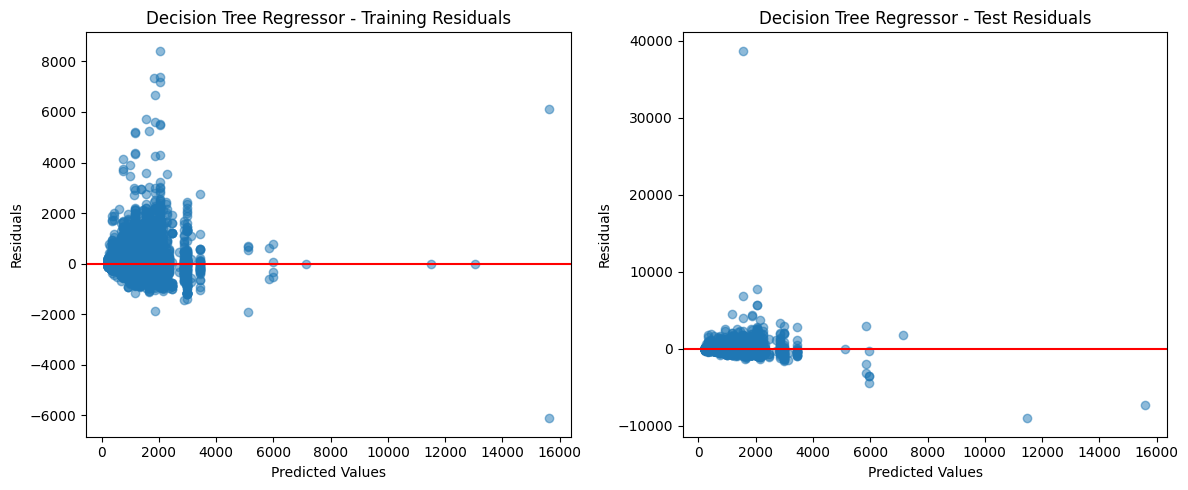

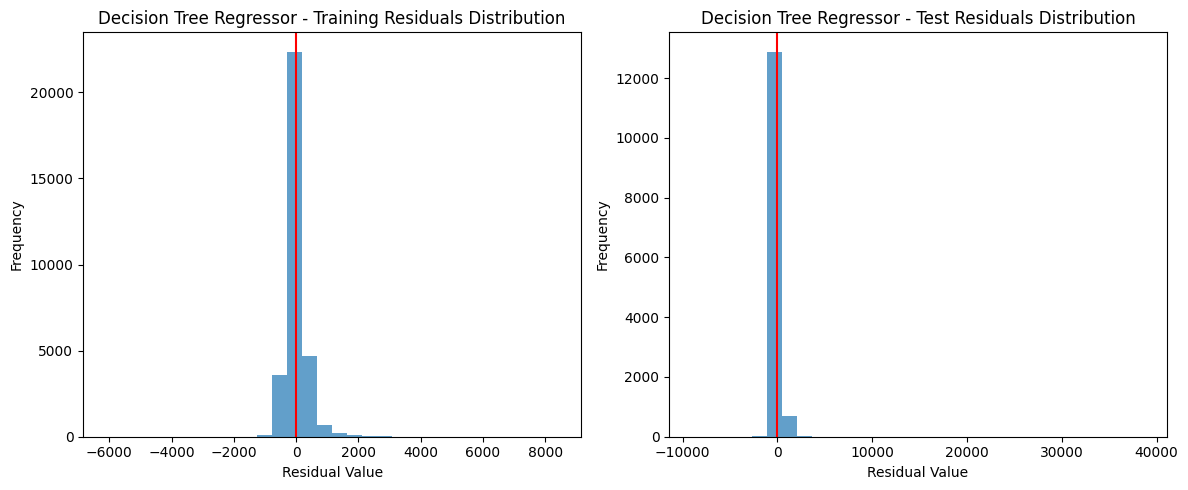

In [50]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth': [3 ,6], 
    'min_samples_split': [2,5],
    'criterion': ['squared_error']
}
print(X_train.head())
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=3, scoring='neg_mean_squared_error')
dt_results = evaluate_model(dt_grid, X_train, X_test, y_train, y_test, "Decision Tree Regressor")


--- Linear Regression ---

Linear Regression with StandardScaler Performance:
Train MSE: 161309.54, Test MSE: 258803.25
Train RMSE: 401.63, Test RMSE: 508.73
Train MAE: 235.35, Test MAE: 237.84
Train R¬≤: 0.6594, Test R¬≤: 0.5464


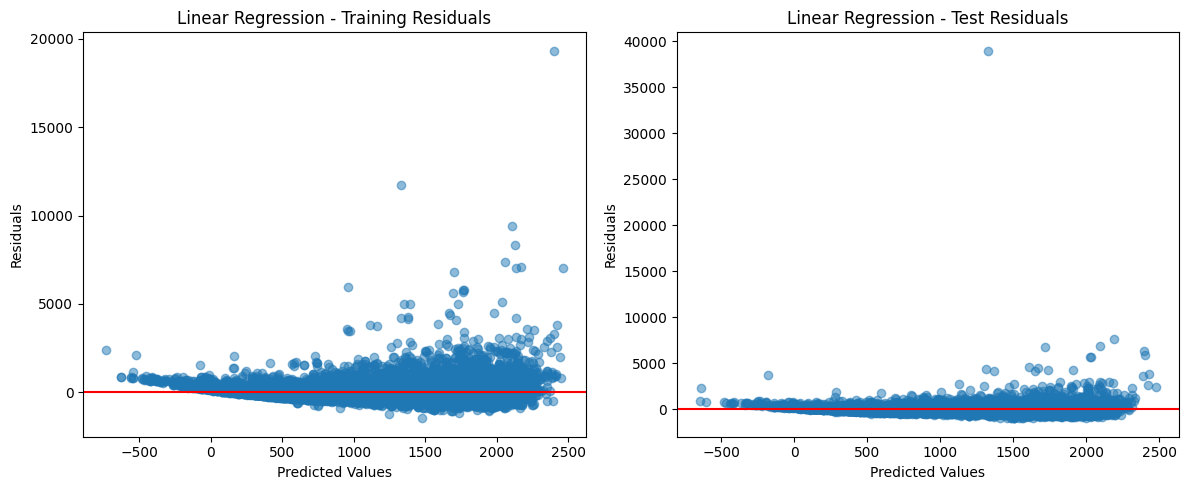

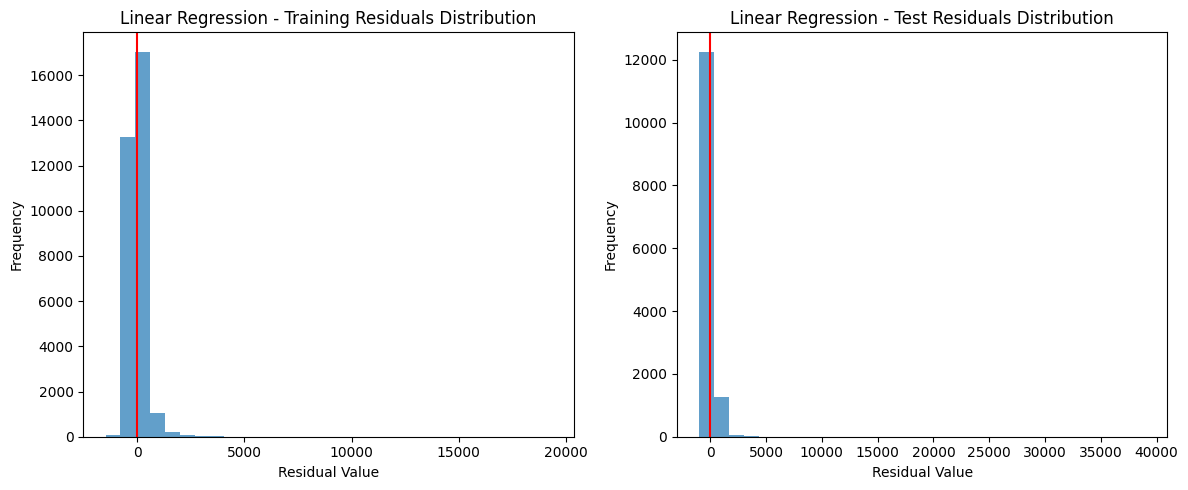


Linear Regression with MinMaxScaler Performance:
Train MSE: 161309.54, Test MSE: 258803.25
Train RMSE: 401.63, Test RMSE: 508.73
Train MAE: 235.35, Test MAE: 237.84
Train R¬≤: 0.6594, Test R¬≤: 0.5464


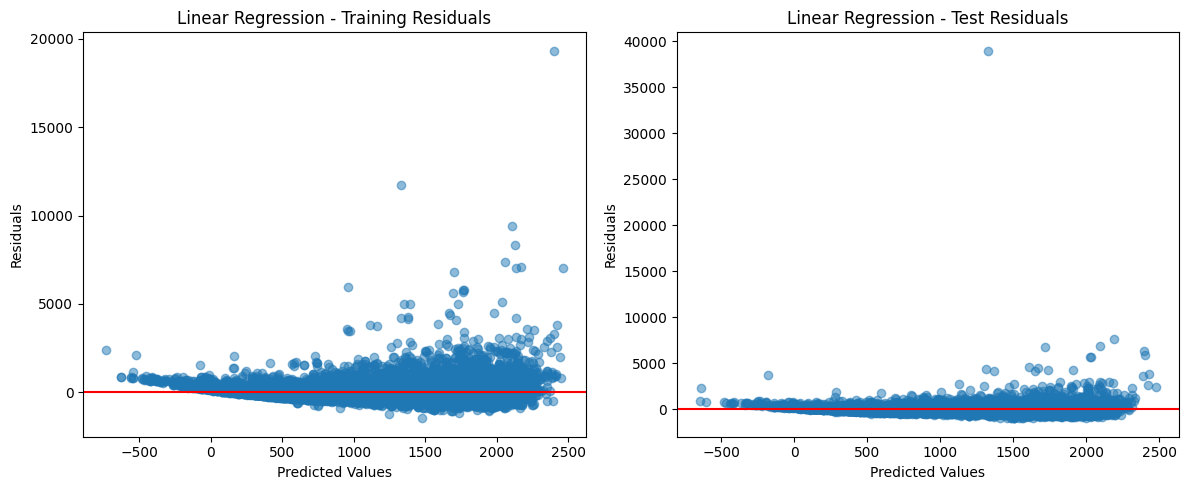

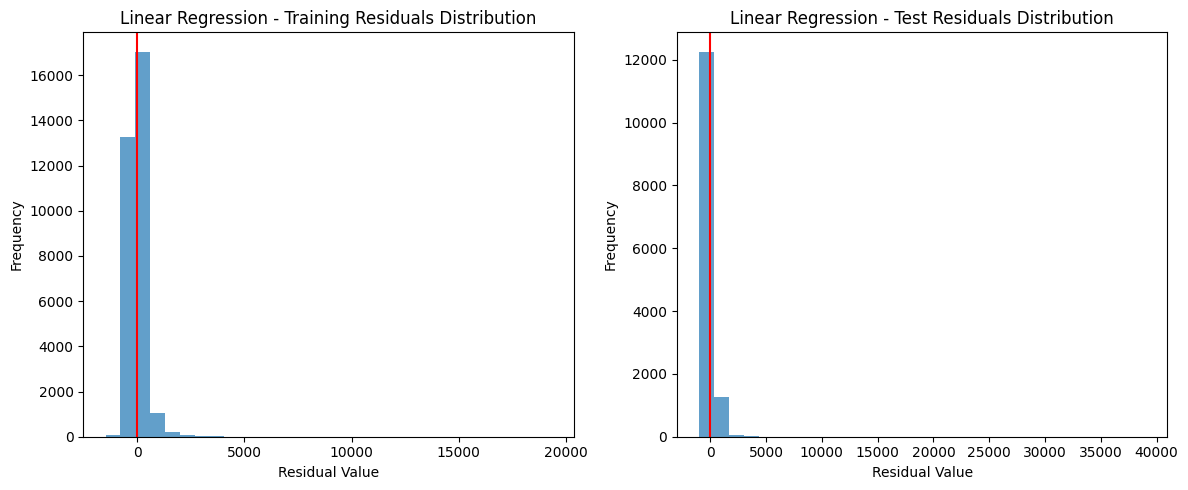


--- Decision Tree Regressor ---

Decision Tree Regressor Performance:
Train MSE: 127230.39, Test MSE: 251068.67
Train RMSE: 356.69, Test RMSE: 501.07
Train MAE: 218.56, Test MAE: 225.20
Train R¬≤: 0.7314, Test R¬≤: 0.5599


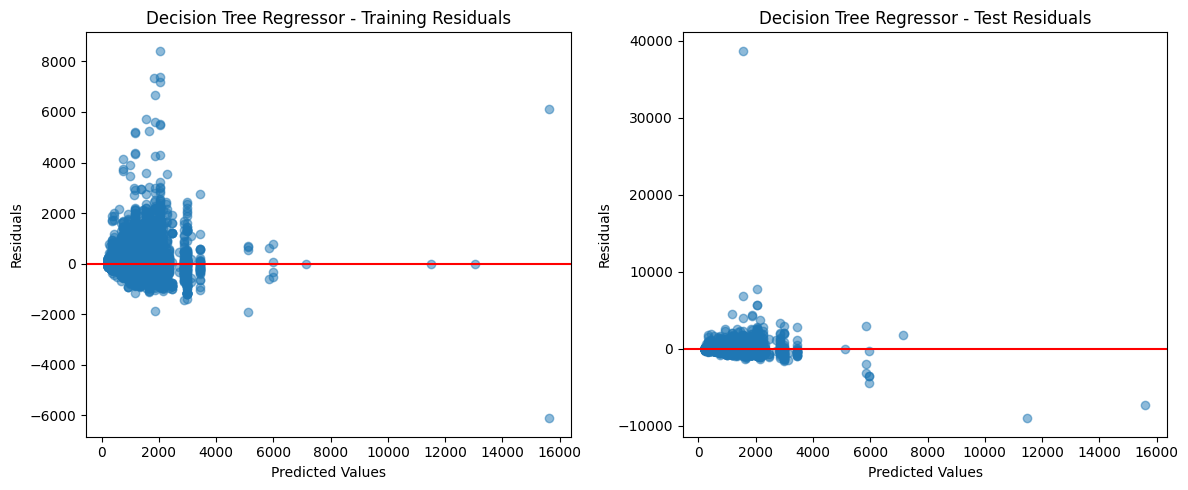

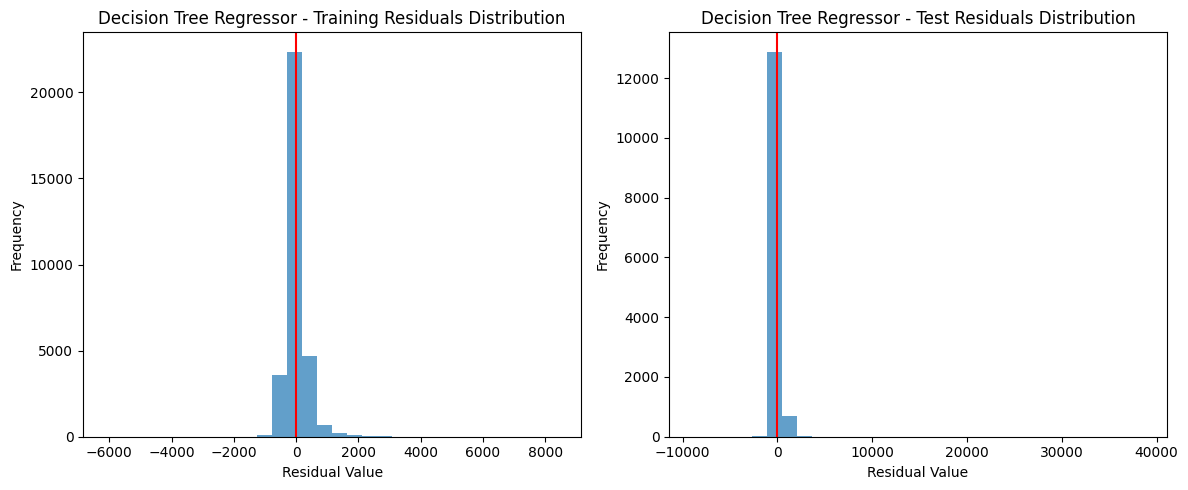

Best parameters: {'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 5}

--- Gaussian Process Regressor (Improved) ---

Testing GPR with RBF kernel

Gaussian Process Regressor (RBF) Performance:
Train MSE: 0.00, Test MSE: 381734.56
Train RMSE: 0.00, Test RMSE: 617.85
Train MAE: 0.00, Test MAE: 503.92
Train R¬≤: 1.0000, Test R¬≤: 0.0054


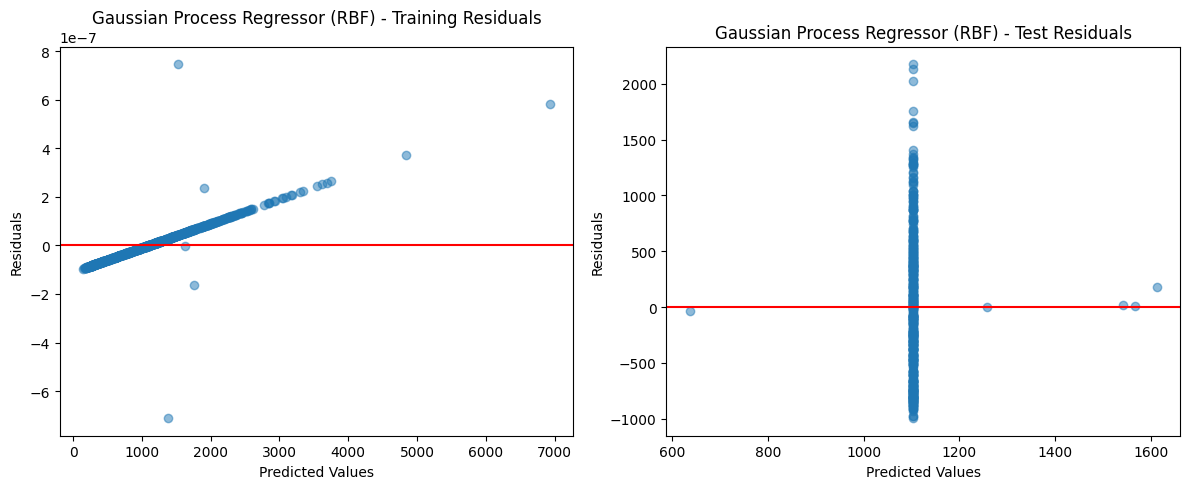

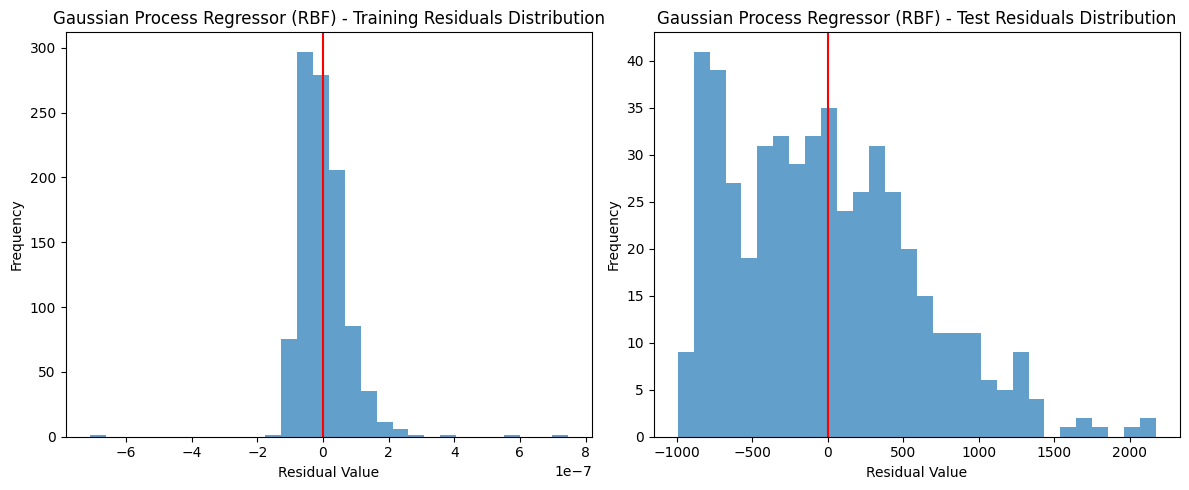


Testing GPR with RBF+White kernel

Gaussian Process Regressor (RBF+White) Performance:
Train MSE: 60126.91, Test MSE: 74648.00
Train RMSE: 245.21, Test RMSE: 273.22
Train MAE: 162.89, Test MAE: 191.52
Train R¬≤: 0.8669, Test R¬≤: 0.8055


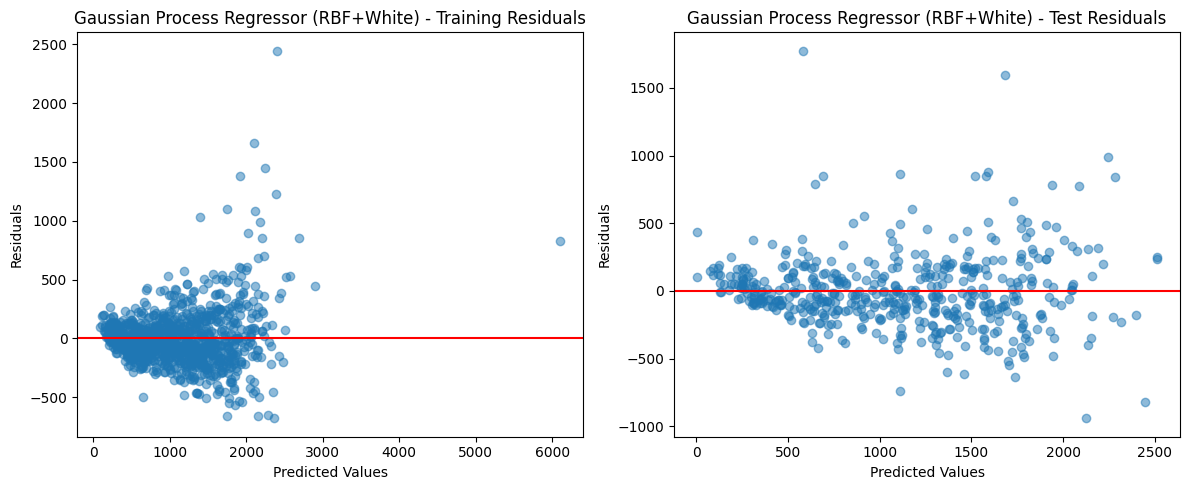

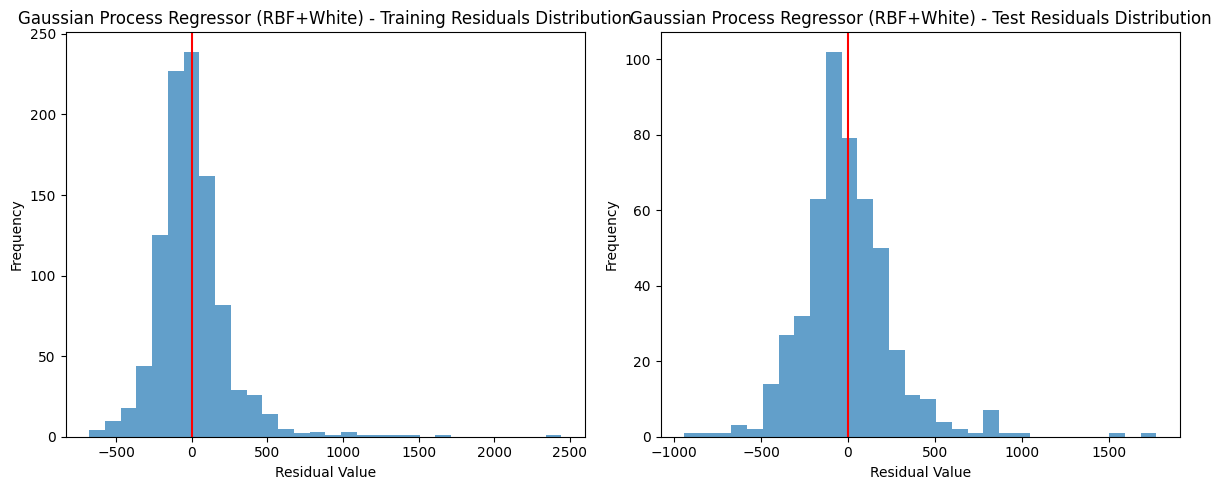


Testing GPR with RQ+White kernel

Gaussian Process Regressor (RQ+White) Performance:
Train MSE: 65065.49, Test MSE: 74204.65
Train RMSE: 255.08, Test RMSE: 272.41
Train MAE: 170.32, Test MAE: 192.02
Train R¬≤: 0.8560, Test R¬≤: 0.8067


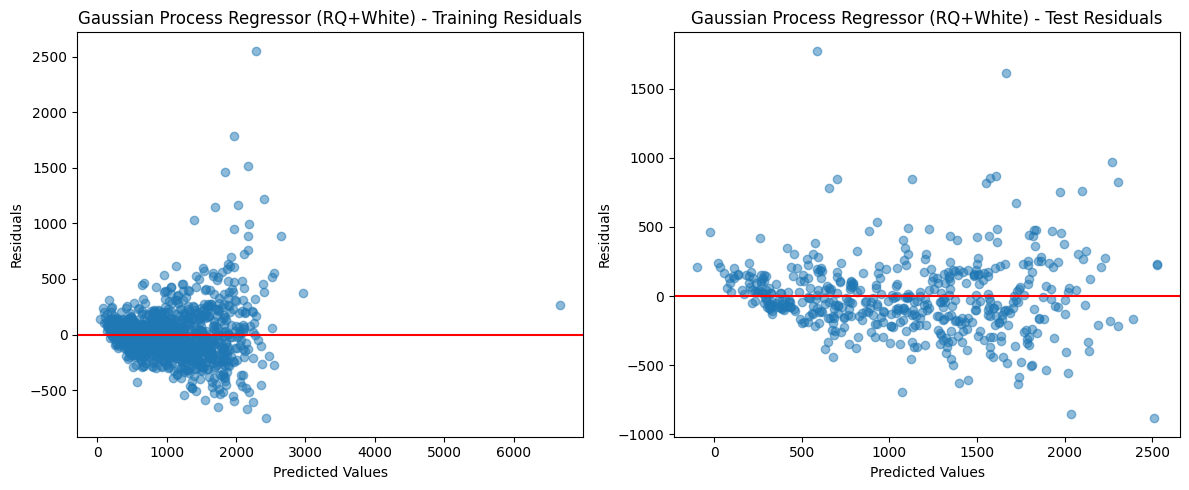

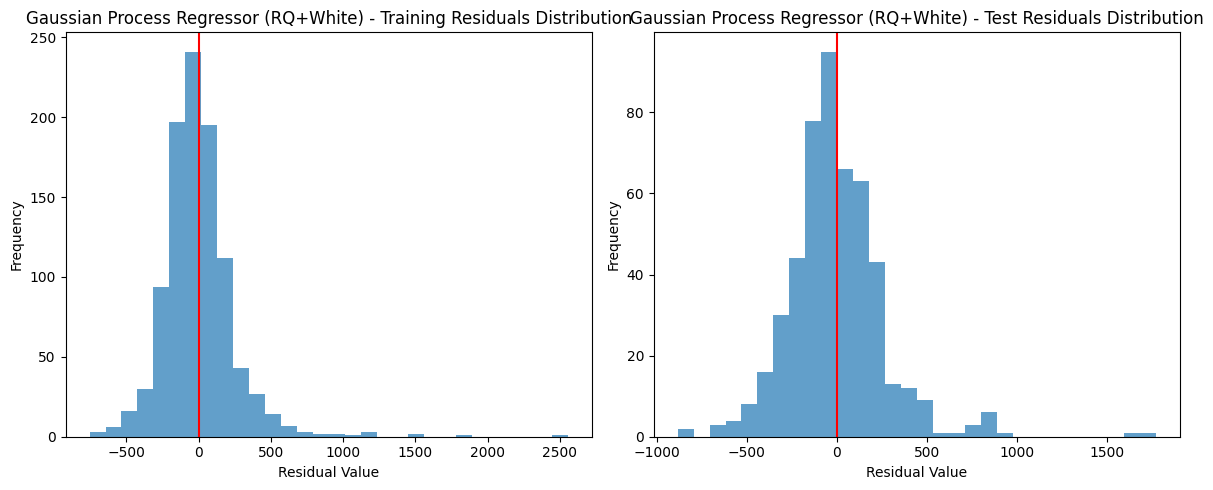


Best GPR kernel: RQ+White with R¬≤ score: 0.8067

--- Random Forest Regressor ---

Random Forest (GridSearch) Performance:
Train MSE: 183833.88, Test MSE: 282259.52
Train RMSE: 428.76, Test RMSE: 531.28
Train MAE: 256.69, Test MAE: 261.09
Train R¬≤: 0.6119, Test R¬≤: 0.5053


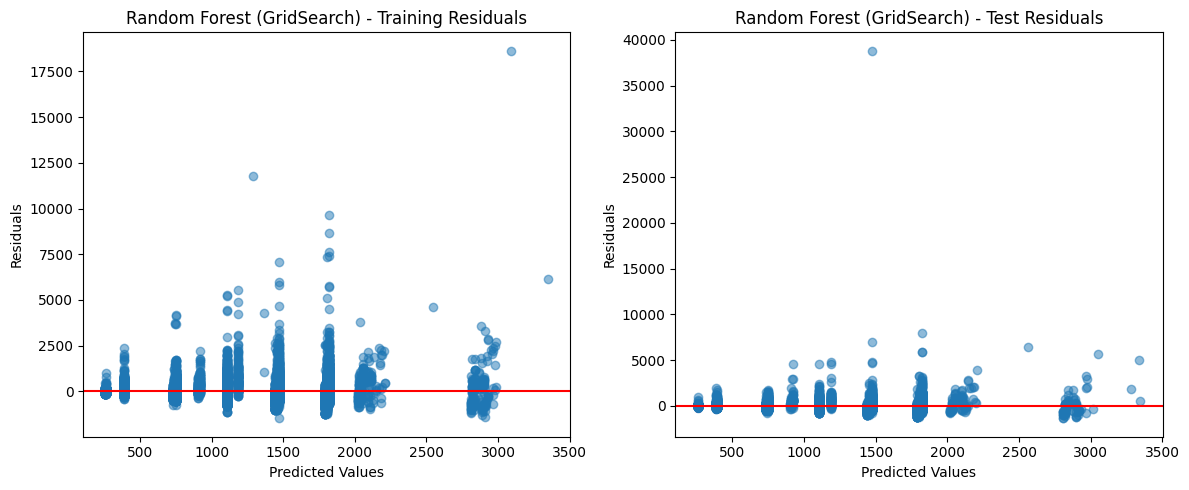

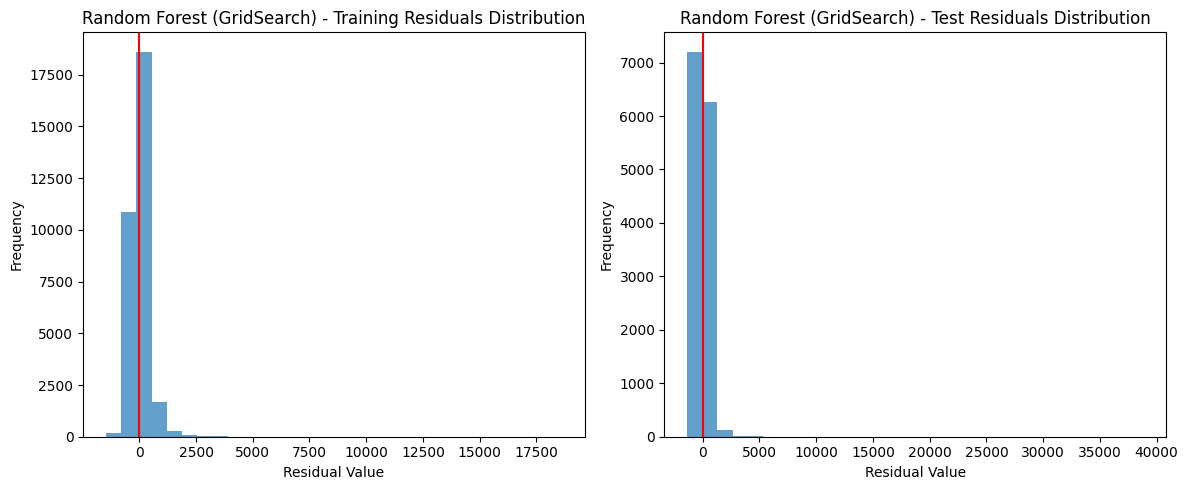

Best RF parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}

--- Gradient Boosting Regressor ---

Gradient Boosting Regressor Performance:
Train MSE: 84854.56, Test MSE: 191948.01
Train RMSE: 291.30, Test RMSE: 438.12
Train MAE: 162.45, Test MAE: 166.46
Train R¬≤: 0.8209, Test R¬≤: 0.6636


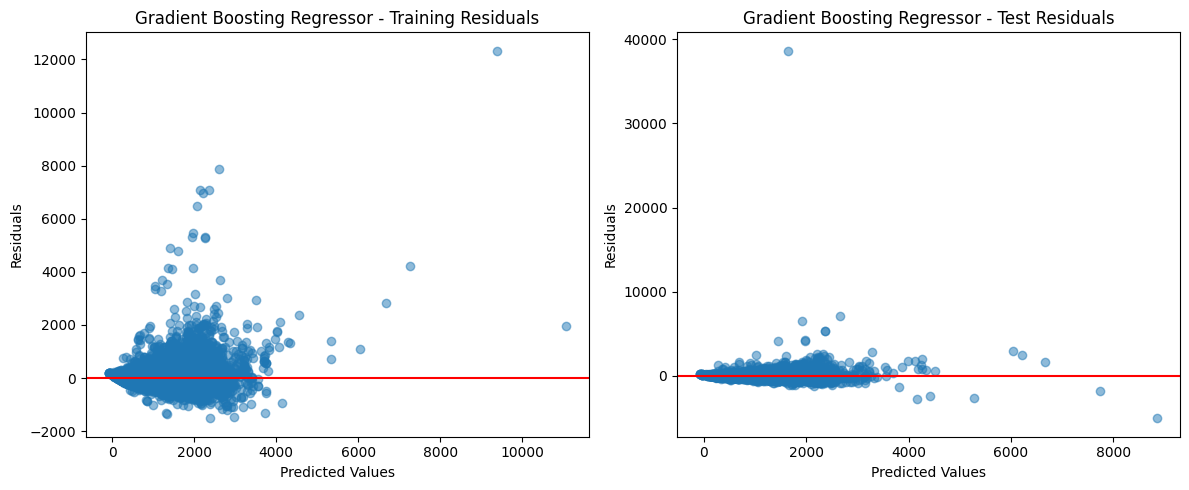

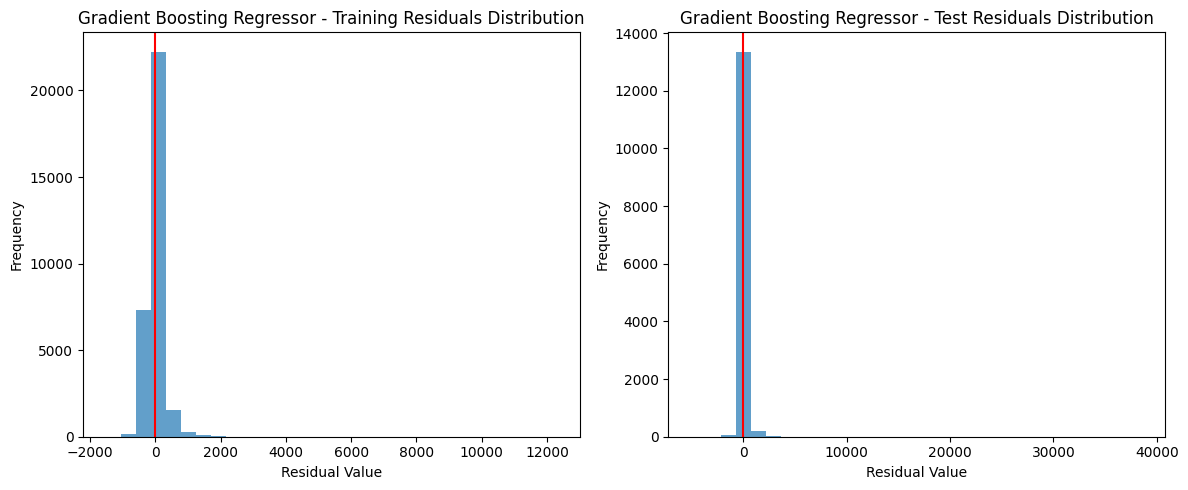


--- Support Vector Regression ---

SVR with linear kernel:

SVR (linear) Performance:
Train MSE: 174432.00, Test MSE: 123847.83
Train RMSE: 417.65, Test RMSE: 351.92
Train MAE: 232.56, Test MAE: 214.72
Train R¬≤: 0.6307, Test R¬≤: 0.6828


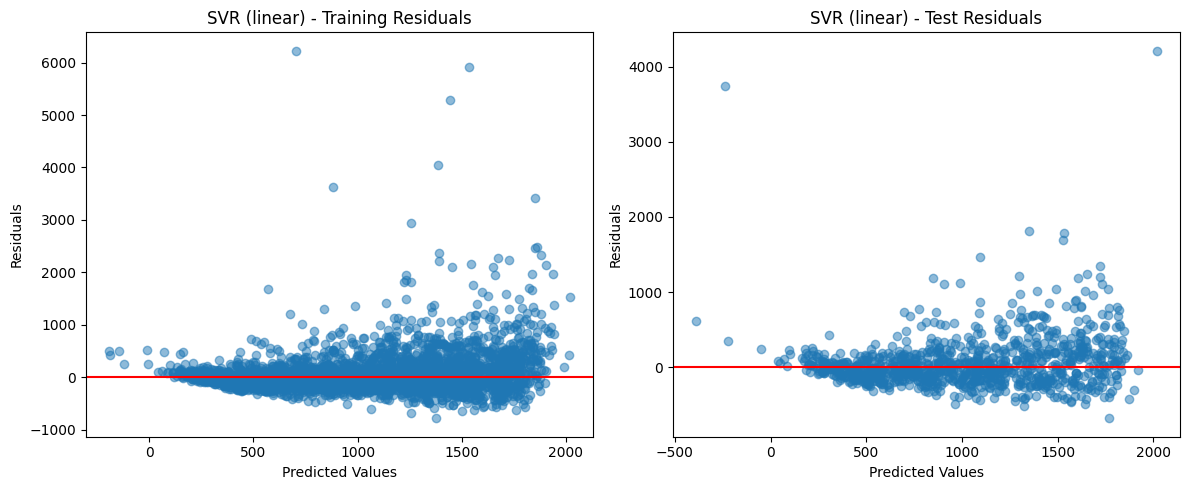

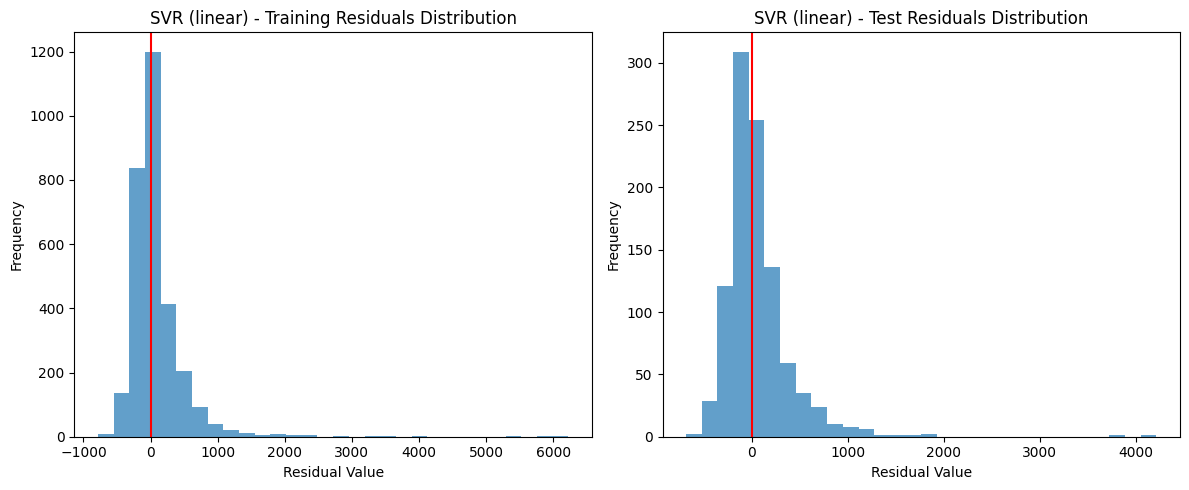


SVR with poly kernel:

SVR (poly) Performance:
Train MSE: 437975.35, Test MSE: 358287.45
Train RMSE: 661.80, Test RMSE: 598.57
Train MAE: 496.29, Test MAE: 468.31
Train R¬≤: 0.0726, Test R¬≤: 0.0823


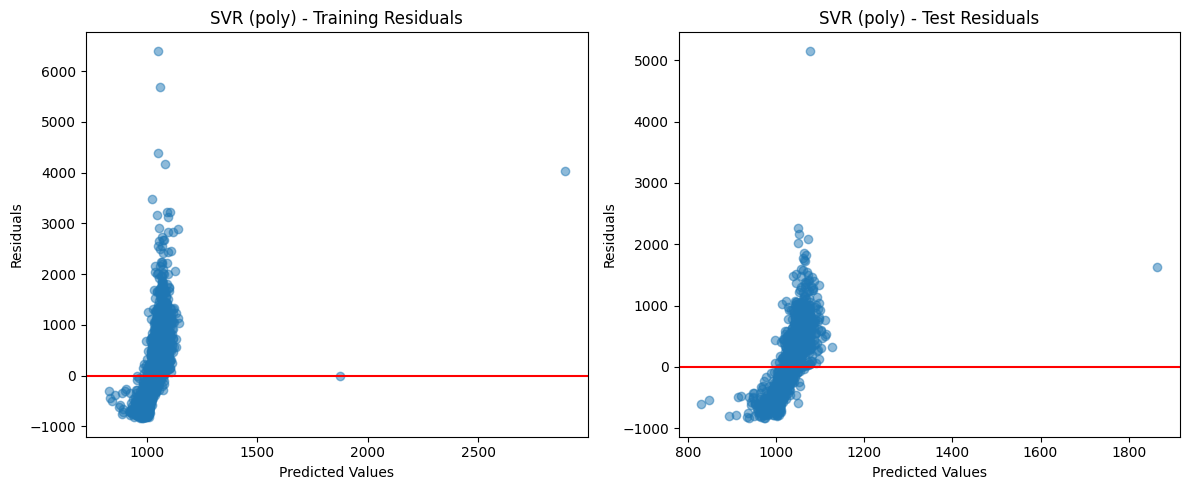

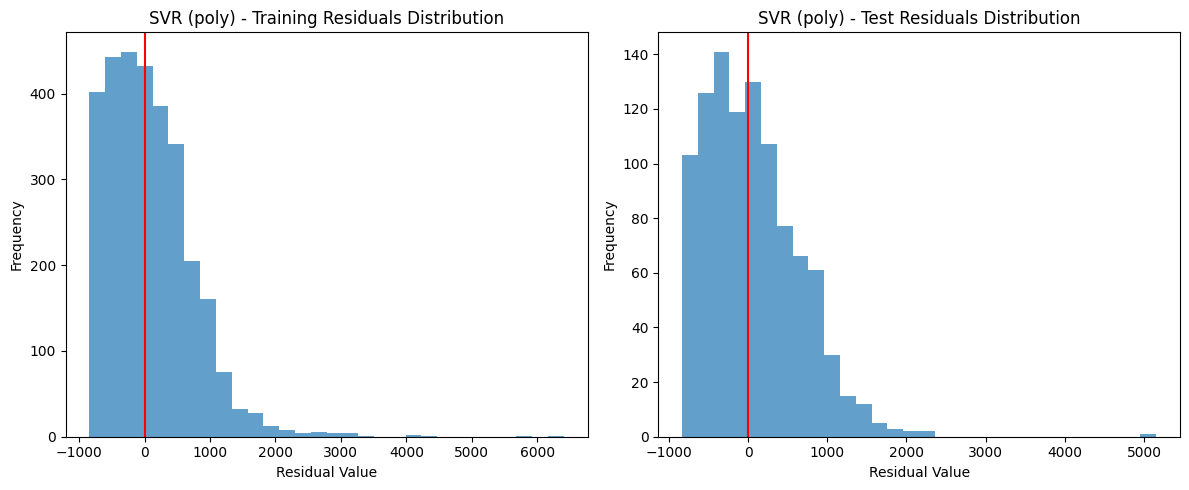


SVR with rbf kernel:

SVR (rbf) Performance:
Train MSE: 435037.30, Test MSE: 352726.81
Train RMSE: 659.57, Test RMSE: 593.91
Train MAE: 489.85, Test MAE: 462.13
Train R¬≤: 0.0789, Test R¬≤: 0.0966


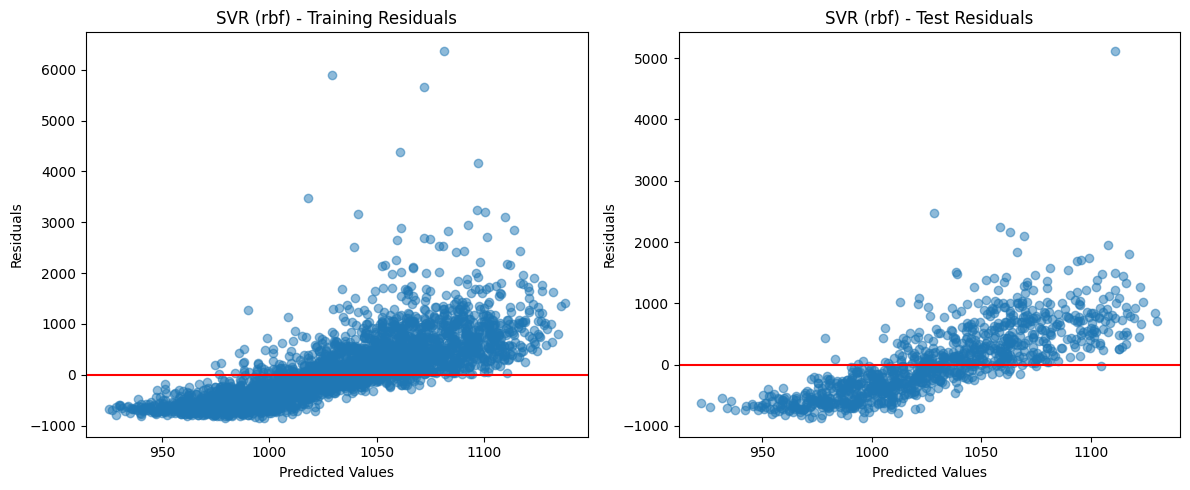

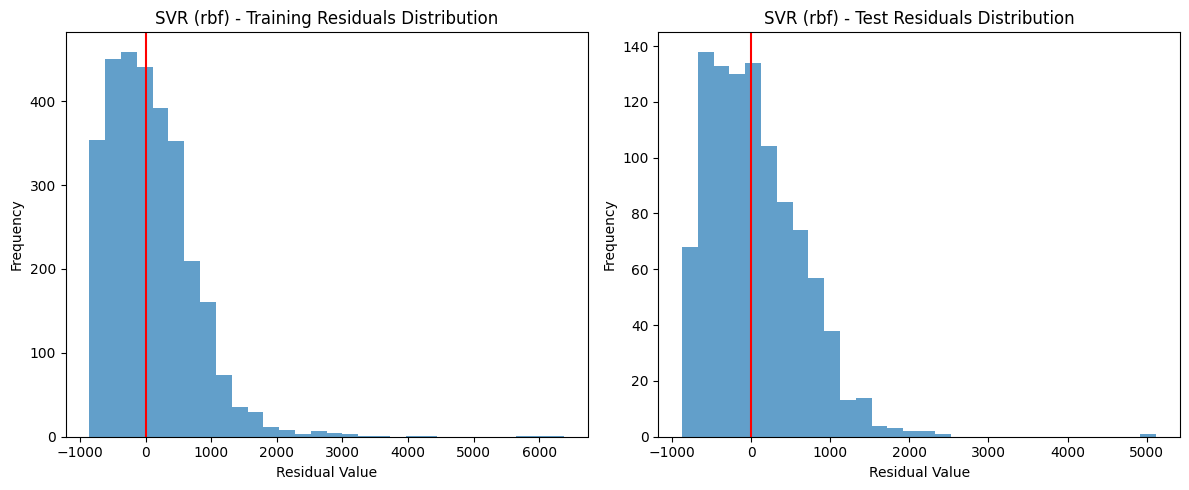


Found 7 traditional ML models for comparison:
  1. Linear Regression (Standard)
  2. Linear Regression (MinMax)
  3. Decision Tree
  4. Gaussian Process (RQ+White)
  5. Random Forest
  6. Gradient Boosting
  7. SVR

=== Traditional ML Model Performance Comparison ===
                       Model       R¬≤        MAE           MSE       RMSE
 Gaussian Process (RQ+White) 0.806665 192.020919  74204.646999 272.405299
           Gradient Boosting 0.663552 166.455320 191948.008110 438.118715
               Decision Tree 0.559925 225.200467 251068.669764 501.067530
  Linear Regression (MinMax) 0.546368 237.842634 258803.246416 508.727084
Linear Regression (Standard) 0.546368 237.842634 258803.246416 508.727084
               Random Forest 0.505253 261.093597 282259.523420 531.281021
                         SVR 0.096567 462.134333 352726.809274 593.908082


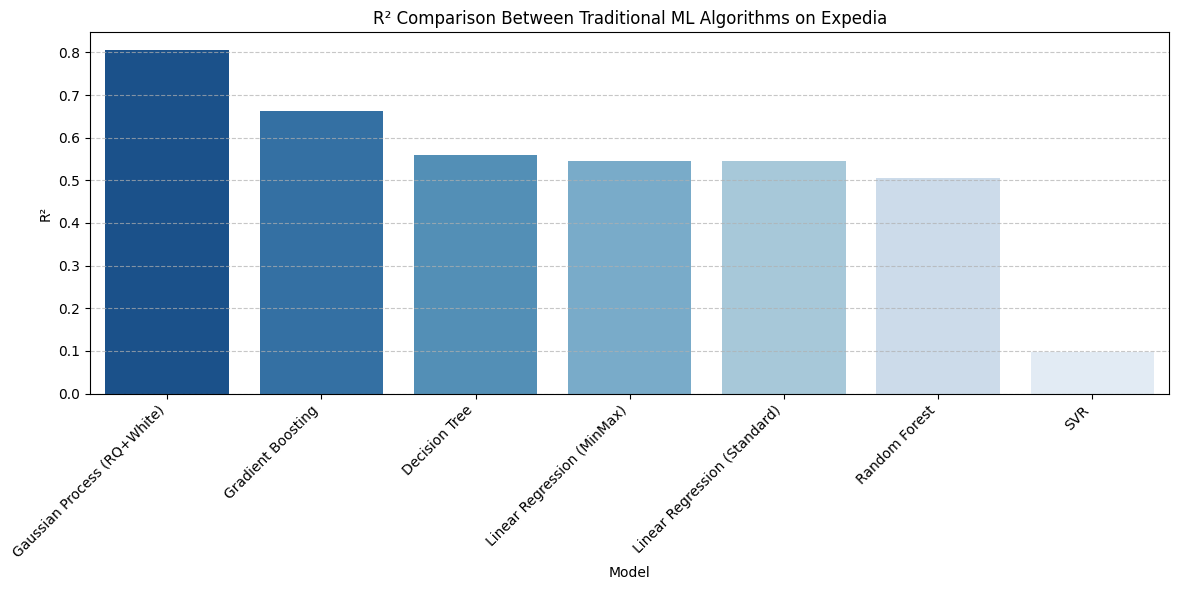

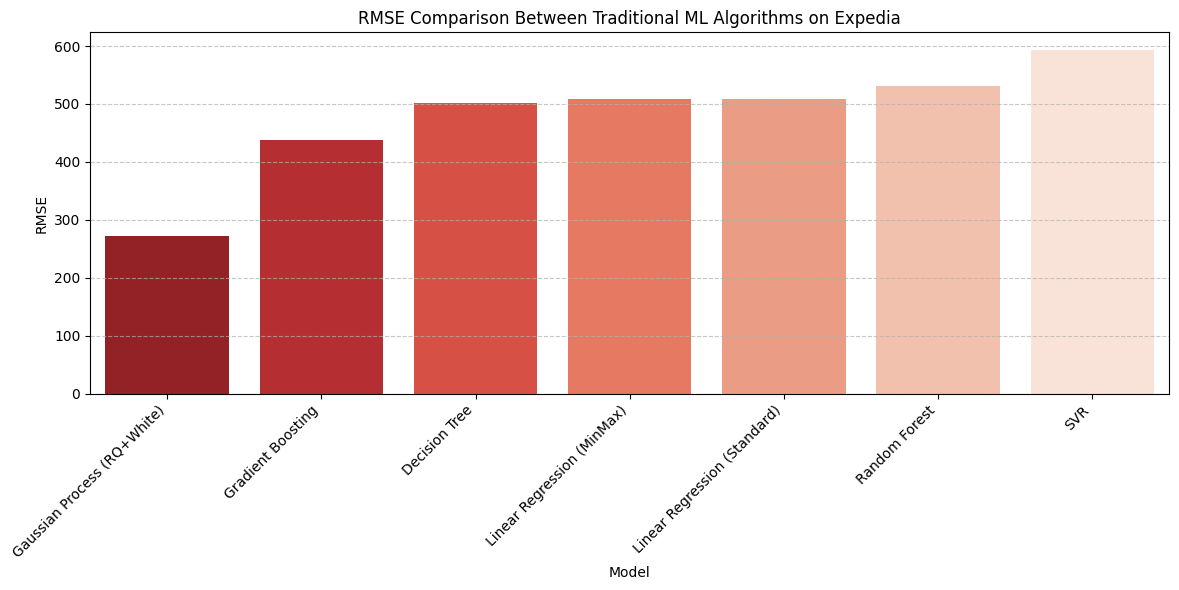

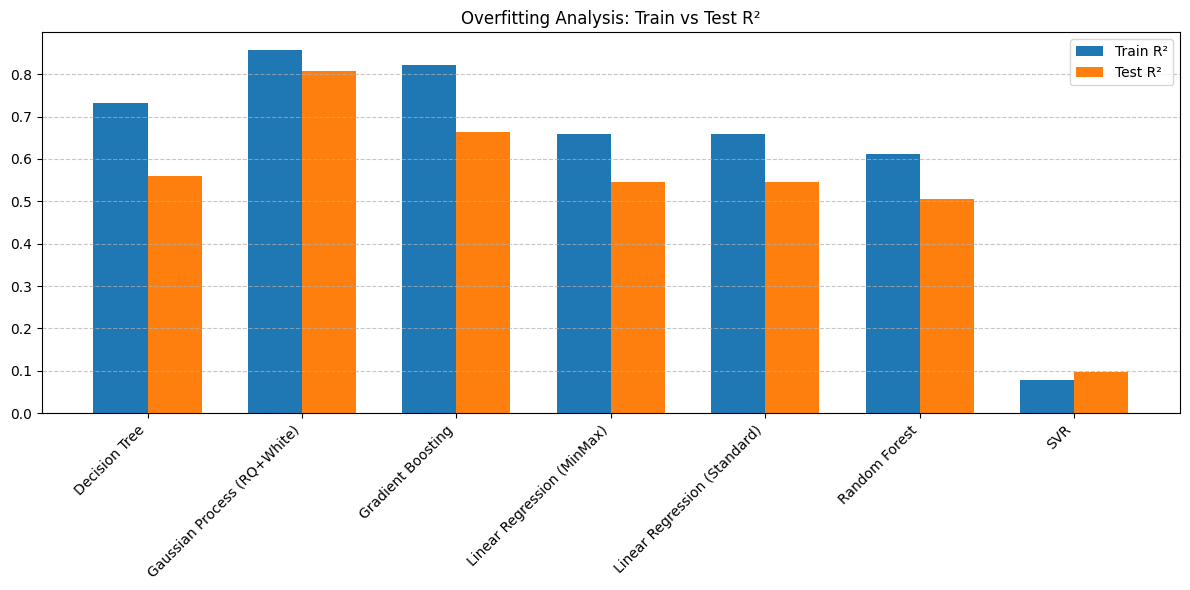

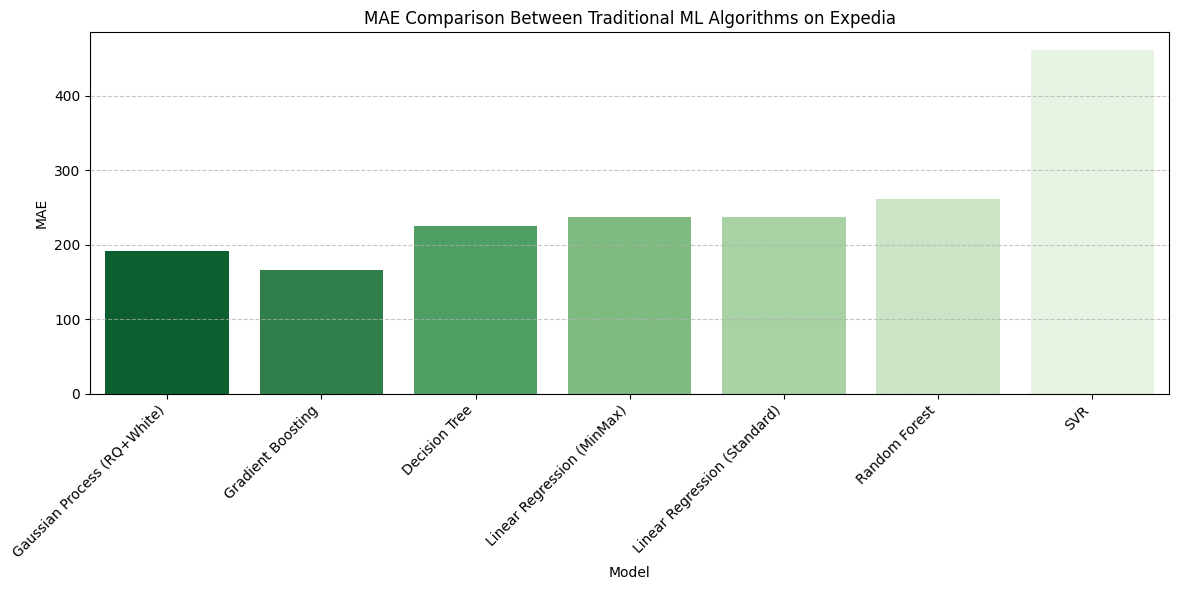


=== Best Performing Traditional ML Model ===
Model: Gaussian Process (RQ+White)
R¬≤ Score: 0.8067
RMSE: 272.41
MAE: 192.02


Model        R¬≤         MAE            MSE  \
3   Gaussian Process (RQ+White)  0.806665  192.020919   74204.646999   
5             Gradient Boosting  0.663552  166.455320  191948.008110   
2                 Decision Tree  0.559925  225.200467  251068.669764   
1    Linear Regression (MinMax)  0.546368  237.842634  258803.246416   
0  Linear Regression (Standard)  0.546368  237.842634  258803.246416   
4                 Random Forest  0.505253  261.093597  282259.523420   
6                           SVR  0.096567  462.134333  352726.809274   

         RMSE  Train R¬≤  Overfitting  
3  272.405299  0.855995     0.049331  
5  438.118715  0.820857     0.157305  
2  501.067530  0.731394     0.171469  
1  508.727084  0.659447     0.113080  
0  508.727084  0.659447     0.113080  
4  531.281021  0.611894     0.106641  
6  593.908082  0.078852    -0.017715

In [ ]:
# Linear Regression
print("\n--- Linear Regression ---")
lr_model = LinearRegression()
lr_results_std = evaluate_model(lr_model, X_train_std, X_test_std, y_train, y_test, 
                               "Linear Regression", "StandardScaler")

# Try with different scaling methods to compare
lr_model_minmax = LinearRegression()
lr_results_minmax = evaluate_model(lr_model_minmax, X_train_minmax, X_test_minmax, y_train, y_test, 
                                  "Linear Regression", "MinMaxScaler")

# Decision Tree Regressor with different parameters
print("\n--- Decision Tree Regressor ---")
dt_params = {
    'max_depth': [3 ,6], 
    'min_samples_split': [2,5],
    'criterion': ['squared_error']
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=3, scoring='neg_mean_squared_error')
dt_results = evaluate_model(dt_grid, X_train, X_test, y_train, y_test, "Decision Tree Regressor")
print(f"Best parameters: {dt_grid.best_params_}")

# Gaussian Process Regressor
print("\n--- Gaussian Process Regressor (Improved) ---")

# Use stratified sampling for better representation (if possible)
sample_size = min(1000, len(X_train))
test_sample_size = min(500, len(X_test))

# Create a smaller sample for GPR
np.random.seed(42)
train_indices = np.random.choice(len(X_train_std), sample_size, replace=False)
test_indices = np.random.choice(len(X_test_std), test_sample_size, replace=False)

X_train_sample = X_train_std[train_indices]
y_train_sample = y_train.iloc[train_indices]
X_test_sample = X_test_std[test_indices]
y_test_sample = y_test.iloc[test_indices]

#kernel configurations
kernels = [
    ("RBF", RBF(length_scale=1.0)),
    ("RBF+White", RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)),  # Reduced noise
    ("RQ+White", RBF(length_scale=1.0) * ConstantKernel(1.0) + WhiteKernel(noise_level=0.1))
]

best_gpr_score = float('-inf')
best_gpr_model = None
best_gpr_kernel_name = ""

for kernel_name, kernel in kernels:
    print(f"\nTesting GPR with {kernel_name} kernel")
    # Add normalize_y=True to handle scale issues
    gpr_model = GaussianProcessRegressor(
        kernel=kernel, 
        n_restarts_optimizer=5, 
        normalize_y=True,  
        random_state=42
    )
    
    try:
        gpr_results = evaluate_model(gpr_model, X_train_sample, X_test_sample, 
                                    y_train_sample, y_test_sample, 
                                    f"Gaussian Process Regressor ({kernel_name})")
        
        # Track the best GPR model
        if gpr_results['test_r2'] > best_gpr_score:
            best_gpr_score = gpr_results['test_r2']
            best_gpr_model = gpr_model
            best_gpr_kernel_name = kernel_name
            
    except Exception as e:
        print(f"Error with {kernel_name} kernel: {e}")

print(f"\nBest GPR kernel: {best_gpr_kernel_name} with R¬≤ score: {best_gpr_score:.4f}")

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print("\n--- Random Forest Regressor ---")

# Quick grid search for Random Forest
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, 
                      scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_results = evaluate_model(rf_grid, X_train, X_test, y_train, y_test, "Random Forest (GridSearch)")
print(f"Best RF parameters: {rf_grid.best_params_}")

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
print("\n--- Gradient Boosting Regressor ---")

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_results = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting Regressor")

# Support Vector Regression
from sklearn.svm import SVR
print("\n--- Support Vector Regression ---")

# Sample the data for SVR - it can be slow on large datasets
sample_size_svr = min(3000, len(X_train))
test_sample_size_svr = min(1000, len(X_test))

# Create a smaller sample for SVR
X_train_sample_svr = X_train_std[:sample_size_svr]
y_train_sample_svr = y_train.iloc[:sample_size_svr]
X_test_sample_svr = X_test_std[:test_sample_size_svr]
y_test_sample_svr = y_test.iloc[:test_sample_size_svr]

# Try different kernels for SVR
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    print(f"\nSVR with {kernel} kernel:")
    svr_model = SVR(kernel=kernel, C=1.0, epsilon=0.1)
    try:
        svr_kernel_results = evaluate_model(
            svr_model, 
            X_train_sample_svr, 
            X_test_sample_svr, 
            y_train_sample_svr, 
            y_test_sample_svr,
            f"SVR ({kernel})"
        )
    except Exception as e:
        print(f"Error with SVR {kernel} kernel: {e}")


def compare_models(): 
    # Get all variables from global scope
    globals_dict = globals()
    
    # Initialize results list
    results = []
    
    # Track models found for reporting
    models_found = []
    
    # 1. LINEAR REGRESSION
    try:
        if 'lr_results_std' in globals_dict:
            results.append({
                'Model': 'Linear Regression (Standard)',
                'R¬≤': globals_dict['lr_results_std']['test_r2'],
                'MAE': globals_dict['lr_results_std']['test_mae'],
                'MSE': globals_dict['lr_results_std']['test_mse'],
                'RMSE': globals_dict['lr_results_std']['test_rmse'],
                'Train R¬≤': globals_dict['lr_results_std']['train_r2']
            })
            models_found.append("Linear Regression (Standard)")
        
        if 'lr_results_minmax' in globals_dict:
            results.append({
                'Model': 'Linear Regression (MinMax)',
                'R¬≤': globals_dict['lr_results_minmax']['test_r2'],
                'MAE': globals_dict['lr_results_minmax']['test_mae'],
                'MSE': globals_dict['lr_results_minmax']['test_mse'],
                'RMSE': globals_dict['lr_results_minmax']['test_rmse'],
                'Train R¬≤': globals_dict['lr_results_minmax']['train_r2']
            })
            models_found.append("Linear Regression (MinMax)")
    except Exception as e:
        print(f"Error adding Linear Regression models: {e}")
    
    # 2. DECISION TREE
    try:
        if 'dt_results' in globals_dict:
            results.append({
                'Model': 'Decision Tree',
                'R¬≤': globals_dict['dt_results']['test_r2'],
                'MAE': globals_dict['dt_results']['test_mae'],
                'MSE': globals_dict['dt_results']['test_mse'],
                'RMSE': globals_dict['dt_results']['test_rmse'],
                'Train R¬≤': globals_dict['dt_results']['train_r2']
            })
            models_found.append("Decision Tree")
    except Exception as e:
        print(f"Error adding Decision Tree: {e}")
    
    # 3. GAUSSIAN PROCESS REGRESSOR
    try:
        if 'best_gpr_score' in globals_dict and 'best_gpr_kernel_name' in globals_dict:
            # Find full GPR results if available
            gpr_results = None
            for var_name, var_val in globals_dict.items():
                if var_name.startswith('gpr_results') and isinstance(var_val, dict):
                    if var_val['test_r2'] == globals_dict['best_gpr_score']:
                        gpr_results = var_val
                        break
            
            if gpr_results:
                results.append({
                    'Model': f"Gaussian Process ({globals_dict['best_gpr_kernel_name']})",
                    'R¬≤': gpr_results['test_r2'],
                    'MAE': gpr_results['test_mae'],
                    'MSE': gpr_results['test_mse'],
                    'RMSE': gpr_results['test_rmse'],
                    'Train R¬≤': gpr_results['train_r2']
                })
            else:
                # If full results not found, add with just R¬≤ score
                results.append({
                    'Model': f"Gaussian Process ({globals_dict['best_gpr_kernel_name']})",
                    'R¬≤': globals_dict['best_gpr_score'],
                    'MAE': np.nan,
                    'MSE': np.nan,
                    'RMSE': np.nan,
                    'Train R¬≤': np.nan
                })
            models_found.append(f"Gaussian Process ({globals_dict['best_gpr_kernel_name']})")
    except Exception as e:
        print(f"Error adding Gaussian Process Regressor: {e}")
    
    # 4. RANDOM FOREST
    try:
        if 'rf_grid_results' in globals_dict:
            results.append({
                'Model': 'Random Forest',
                'R¬≤': globals_dict['rf_grid_results']['test_r2'],
                'MAE': globals_dict['rf_grid_results']['test_mae'],
                'MSE': globals_dict['rf_grid_results']['test_mse'],
                'RMSE': globals_dict['rf_grid_results']['test_rmse'],
                'Train R¬≤': globals_dict['rf_grid_results']['train_r2']
            })
            models_found.append("Random Forest")
    except Exception as e:
        print(f"Error adding Random Forest: {e}")
    
    # 5. GRADIENT BOOSTING
    try:
        if 'gb_results' in globals_dict:
            results.append({
                'Model': 'Gradient Boosting',
                'R¬≤': globals_dict['gb_results']['test_r2'],
                'MAE': globals_dict['gb_results']['test_mae'],
                'MSE': globals_dict['gb_results']['test_mse'],
                'RMSE': globals_dict['gb_results']['test_rmse'],
                'Train R¬≤': globals_dict['gb_results']['train_r2']
            })
            models_found.append("Gradient Boosting")
    except Exception as e:
        print(f"Error adding Gradient Boosting: {e}")
    
    # 6. SUPPORT VECTOR REGRESSION
    try:
        # Check for different kernel results
        for kernel in ['linear', 'poly', 'rbf']:
            var_name = f'svr_kernel_results_{kernel}'
            if var_name in globals_dict:
                results.append({
                    'Model': f'SVR ({kernel})',
                    'R¬≤': globals_dict[var_name]['test_r2'],
                    'MAE': globals_dict[var_name]['test_mae'],
                    'MSE': globals_dict[var_name]['test_mse'],
                    'RMSE': globals_dict[var_name]['test_rmse'],
                    'Train R¬≤': globals_dict[var_name]['train_r2']
                })
                models_found.append(f"SVR ({kernel})")
        
        # Check for generic SVR results
        if 'svr_kernel_results' in globals_dict:
            results.append({
                'Model': 'SVR',
                'R¬≤': globals_dict['svr_kernel_results']['test_r2'],
                'MAE': globals_dict['svr_kernel_results']['test_mae'],
                'MSE': globals_dict['svr_kernel_results']['test_mse'],
                'RMSE': globals_dict['svr_kernel_results']['test_rmse'],
                'Train R¬≤': globals_dict['svr_kernel_results']['train_r2']
            })
            models_found.append("SVR")
    except Exception as e:
        print(f"Error adding SVR models: {e}")
    
    # Print summary of models found
    print(f"\nFound {len(models_found)} traditional ML models for comparison:")
    for i, model in enumerate(models_found, 1):
        print(f"  {i}. {model}")
    
    # Convert to DataFrame
    if results:
        results_df = pd.DataFrame(results)
        
        # Sort by R¬≤ (descending)
        results_df = results_df.sort_values(by='R¬≤', ascending=False)
        
        # Display as table
        print("\n=== Traditional ML Model Performance Comparison ===")
        print(results_df[['Model', 'R¬≤', 'MAE', 'MSE', 'RMSE']].to_string(index=False))
        
        # ========== Create Visualizations ==========
        
        # 1. R¬≤ Comparison
        plt.figure(figsize=(12, 6))
        plt.title('R¬≤ Comparison Between Traditional ML Algorithms on Expedia')
        ax = sns.barplot(data=results_df, x='Model', y='R¬≤', palette='Blues_r')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # 2. RMSE Comparison
        plt.figure(figsize=(12, 6))
        plt.title('RMSE Comparison Between Traditional ML Algorithms on Expedia')
        ax = sns.barplot(data=results_df, x='Model', y='RMSE', palette='Reds_r')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # 3. Overfitting Analysis
        results_df['Overfitting'] = results_df['Train R¬≤'] - results_df['R¬≤']
        results_df_sorted = results_df.sort_values(by='Model')
        
        # Only include models that have both train and test R¬≤
        mask = ~(results_df_sorted['Train R¬≤'].isna() | results_df_sorted['R¬≤'].isna())
        results_df_filtered = results_df_sorted[mask]
        
        if not results_df_filtered.empty:
            plt.figure(figsize=(12, 6))
            plt.title('Overfitting Analysis: Train vs Test R¬≤')
            x = np.arange(len(results_df_filtered))
            width = 0.35
            plt.bar(x - width/2, results_df_filtered['Train R¬≤'], width, label='Train R¬≤')
            plt.bar(x + width/2, results_df_filtered['R¬≤'], width, label='Test R¬≤')
            plt.xticks(x, results_df_filtered['Model'], rotation=45, ha='right')
            plt.legend()
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        
        # 4. MAE Comparison
        plt.figure(figsize=(12, 6))
        plt.title('MAE Comparison Between Traditional ML Algorithms on Expedia')
        ax = sns.barplot(data=results_df, x='Model', y='MAE', palette='Greens_r')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # ========== Identify Best Model ==========
        best_model = results_df.iloc[0]['Model']
        best_r2 = results_df.iloc[0]['R¬≤']
        print(f"\n=== Best Performing Traditional ML Model ===")
        print(f"Model: {best_model}")
        print(f"R¬≤ Score: {best_r2:.4f}")
        print(f"RMSE: {results_df.iloc[0]['RMSE']:.2f}")
        print(f"MAE: {results_df.iloc[0]['MAE']:.2f}")
        
        
        return results_df
    else:
        print("No model results found. Please check that models have been trained and evaluated.")
        return None

compare_models()

◊î◊ß◊ï◊ì ◊©◊ú ◊ê◊ï◊§◊ô◊®:

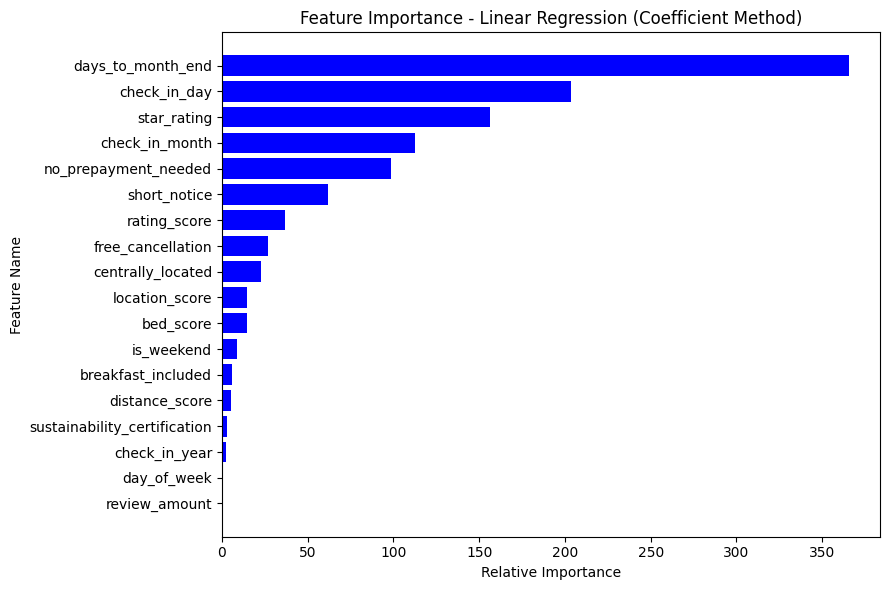


Linear Regression Feature Importance:
                         Feature  Importance
0              days_to_month_end  365.476814
1                   check_in_day  203.409238
2                    star_rating  156.368410
3                 check_in_month  112.425675
4           no_prepayment_needed   98.539444
5                   short_notice   61.663335
6                   rating_score   36.521511
7              free_cancellation   26.675591
8              centrally_located   22.996855
9                 location_score   14.712406
10                     bed_score   14.577106
11                    is_weekend    8.936803
12            breakfast_included    5.984004
13                distance_score    5.329449
14  sustainability_certification    3.000084
15                 check_in_year    2.339725
16                   day_of_week    0.099505
17                 review_amount    0.018510


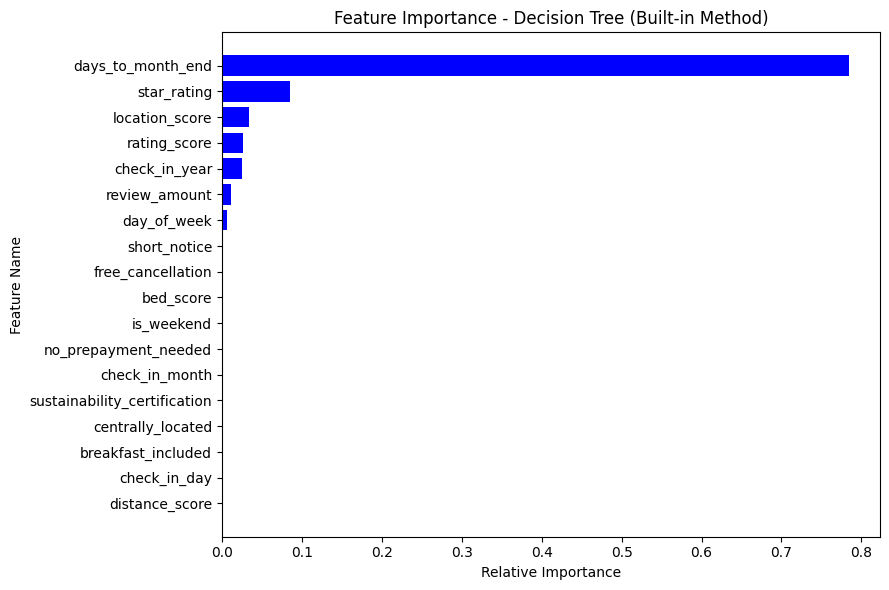


Decision Tree Feature Importance (Built-in Method):
                         Feature  Importance
0                 distance_score    0.000000
1                   check_in_day    0.000000
2             breakfast_included    0.000000
3              centrally_located    0.000000
4   sustainability_certification    0.000000
5                 check_in_month    0.000000
6           no_prepayment_needed    0.000017
7                     is_weekend    0.000761
8                      bed_score    0.000914
9              free_cancellation    0.001353
10                  short_notice    0.001994
11                   day_of_week    0.006954
12                 review_amount    0.011091
13                 check_in_year    0.024715
14                  rating_score    0.026067
15                location_score    0.033301
16                   star_rating    0.085244
17             days_to_month_end    0.784025


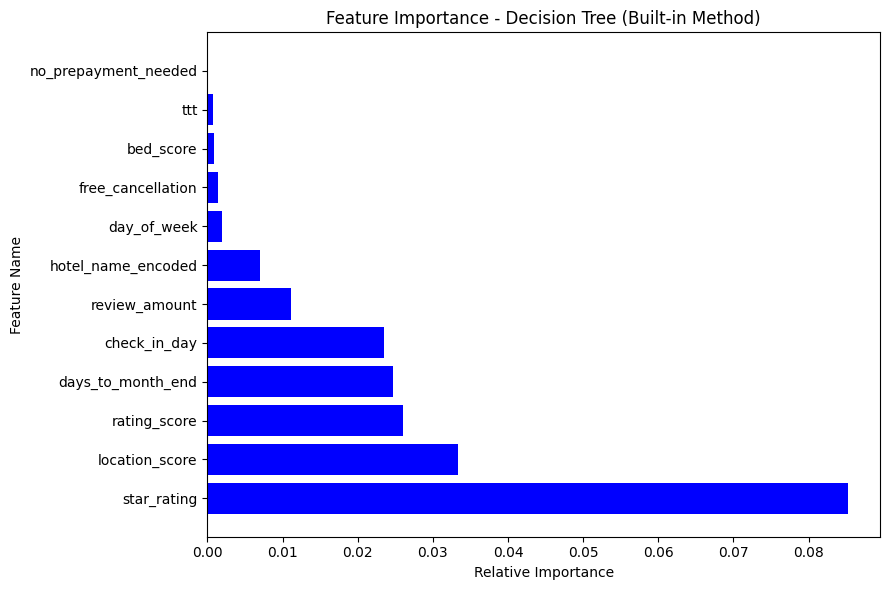


Decision Tree Feature Importance (Built-in Method):
                 Feature  Importance
0            star_rating    0.085244
1         location_score    0.033301
2           rating_score    0.026067
3      days_to_month_end    0.024715
4           check_in_day    0.023563
5          review_amount    0.011091
6     hotel_name_encoded    0.006954
7            day_of_week    0.001994
8      free_cancellation    0.001353
9              bed_score    0.000914
10                   ttt    0.000761
11  no_prepayment_needed    0.000017


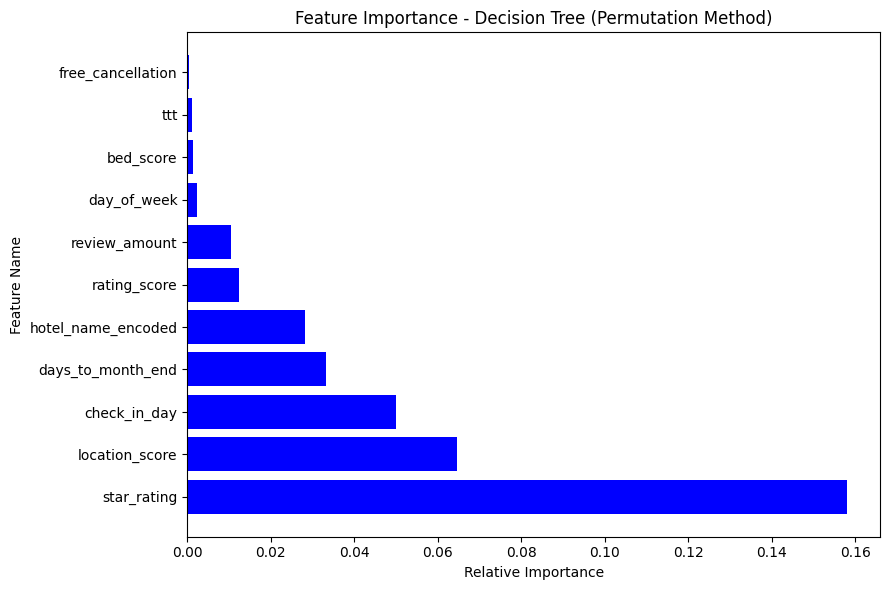


Decision Tree Feature Importance (Permutation Method):
               Feature  Importance
0          star_rating    0.157995
1       location_score    0.064569
2         check_in_day    0.050035
3    days_to_month_end    0.033231
4   hotel_name_encoded    0.028137
5         rating_score    0.012477
6        review_amount    0.010410
7          day_of_week    0.002298
8            bed_score    0.001296
9                  ttt    0.001164
10   free_cancellation    0.000320


In [52]:
# 1. Linear Regression Feature Importance - Coefficient Method

# ◊®◊©◊ô◊û◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊©◊ê◊ô◊†◊ü ◊§◊ô◊¶'◊®◊ô◊ù
exclude_cols = ['price', 'snapshot', 'checkin', 'checkout', 'ttt', 'los', 'hotel_name_encoded', 'group_index','hotel_name']  
feature_cols = [col for col in df.columns if col not in exclude_cols]  # ◊©◊û◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊ë◊§◊ï◊¢◊ú

# ◊î◊§◊ô◊õ◊™ ◊©◊û◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊ú◊û◊¢◊®◊ö NumPy
feature_names = np.array(feature_cols)

# ◊ô◊¶◊ô◊®◊™ ◊ï◊î◊õ◊©◊®◊™ ◊î◊û◊ï◊ì◊ú
lr = LinearRegression()
lr.fit(X_train, y_train)

# ◊ó◊ô◊©◊ï◊ë ◊î◊ó◊©◊ô◊ë◊ï◊™ ◊©◊ú ◊õ◊ú ◊§◊ô◊¶'◊®
lr_importances = np.abs(lr.coef_)

# ◊û◊ô◊ï◊ü ◊î◊ê◊ô◊†◊ì◊ß◊°◊ô◊ù ◊©◊ú ◊î◊ó◊©◊ô◊ë◊ï◊ô◊ï◊™ ◊ë◊°◊ì◊® ◊ô◊ï◊®◊ì
lr_indices = np.argsort(lr_importances)[::-1]

# ◊°◊ô◊†◊ï◊ü ◊ê◊ô◊†◊ì◊ß◊°◊ô◊ù ◊ó◊ï◊ß◊ô◊ô◊ù ◊ë◊ú◊ë◊ì
valid_indices = [i for i in lr_indices if i < len(feature_names)]
valid_feature_names = feature_names[valid_indices]  # ◊©◊û◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊î◊™◊ï◊ê◊û◊ô◊ù
valid_lr_importances = lr_importances[valid_indices]  # ◊¢◊®◊õ◊ô ◊î◊ó◊©◊ô◊ë◊ï◊™ ◊î◊™◊ï◊ê◊û◊ô◊ù

# ◊©◊®◊ò◊ï◊ò ◊î◊í◊®◊£
plt.figure(figsize=(9, 6))
plt.title("Feature Importance - Linear Regression (Coefficient Method)")
plt.barh(valid_feature_names, valid_lr_importances, color="blue", align="center")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ◊î◊ì◊§◊°◊™ ◊ò◊ë◊ú◊™ ◊ó◊©◊ô◊ë◊ï◊ô◊ï◊™
lr_importance_df = pd.DataFrame({
    "Feature": valid_feature_names, 
    "Importance": valid_lr_importances
})

print("\nLinear Regression Feature Importance:")
print(lr_importance_df)

# 2. Decision Tree Feature Importance - Built-in Method (Algorithm-Specific)

# ◊ô◊¶◊ô◊®◊™ ◊ï◊î◊õ◊©◊®◊™ ◊î◊û◊ï◊ì◊ú
dt = DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=42)
dt.fit(X_train, y_train)

# ◊ó◊ô◊©◊ï◊ë ◊ó◊©◊ô◊ë◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù
dt_importances = dt.feature_importances_

# ◊ï◊ï◊ô◊ì◊ï◊ê ◊©◊©◊û◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊™◊ï◊ê◊û◊ô◊ù ◊ú◊ê◊ô◊†◊ì◊ß◊°◊ô◊ù
feature_names = np.array(feature_cols)  # ◊©◊ô◊û◊ï◊© ◊ë◊¢◊û◊ï◊ì◊ï◊™ ◊ë◊§◊ï◊¢◊ú
dt_indices = np.argsort(dt_importances)[::-1]  # ◊û◊ô◊ï◊ü ◊ô◊ï◊®◊ì ◊ú◊§◊ô ◊ó◊©◊ô◊ë◊ï◊™

# ◊°◊ô◊†◊ï◊ü ◊ê◊ô◊†◊ì◊ß◊°◊ô◊ù ◊ó◊ï◊ß◊ô◊ô◊ù ◊ë◊ú◊ë◊ì
valid_indices = [i for i in dt_indices if i < len(feature_names)]
valid_feature_names = feature_names[valid_indices]  # ◊©◊û◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊î◊û◊™◊ê◊ô◊û◊ô◊ù
valid_dt_importances = dt_importances[valid_indices]  # ◊ó◊©◊ô◊ë◊ï◊ô◊ï◊™ ◊û◊™◊ê◊ô◊û◊ï◊™

# **◊î◊§◊ï◊ö ◊ê◊™ ◊î◊°◊ì◊® ◊©◊ú ◊î◊†◊™◊ï◊†◊ô◊ù - ◊õ◊ö ◊©◊î◊ó◊©◊ï◊ë ◊ë◊ô◊ï◊™◊® ◊ô◊î◊ô◊î ◊ë◊®◊ê◊©**
valid_feature_names = valid_feature_names[::-1]
valid_dt_importances = valid_dt_importances[::-1]

# ◊©◊®◊ò◊ï◊ò ◊î◊í◊®◊£
plt.figure(figsize=(9, 6))
plt.title("Feature Importance - Decision Tree (Built-in Method)")
plt.barh(valid_feature_names, valid_dt_importances, color="blue", align="center")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

# ◊î◊¶◊í◊™ ◊ò◊ë◊ú◊™ ◊î◊ó◊©◊ô◊ë◊ï◊ô◊ï◊™
dt_importance_df = pd.DataFrame({
    "Feature": valid_feature_names, 
    "Importance": valid_dt_importances
})

print("\nDecision Tree Feature Importance (Built-in Method):")
print(dt_importance_df)

# ### 3. Linear Regression - Permutation Importance (Black-box Method)

# Create scaler for Linear Regression permutation importance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression on scaled data
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

# Calculate permutation importance
# Use a subset of data for faster computation
sample_indices = np.random.choice(len(X_test_scaled), min(1000, len(X_test_scaled)), replace=False)
X_sample = X_test_scaled[sample_indices]
y_sample = y_test.iloc[sample_indices]

# 4. Decision Tree - Permutation Importance (Black-box Method)

# ‚úÖ ◊ô◊¶◊ô◊®◊™ ◊ï◊î◊õ◊©◊®◊™ ◊î◊û◊ï◊ì◊ú - Decision Tree
dt = DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=42)
dt.fit(X_train, y_train)

# üìå ◊ó◊ô◊©◊ï◊ë ◊ó◊©◊ô◊ë◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù
dt_importances = dt.feature_importances_

# üìå ◊ï◊ï◊ô◊ì◊ï◊ê ◊©◊ê◊†◊ó◊†◊ï ◊û◊™◊ô◊ô◊ó◊°◊ô◊ù ◊®◊ß ◊ú◊§◊ô◊¶'◊®◊ô◊ù ◊î◊ß◊ô◊ô◊û◊ô◊ù
actual_feature_names = np.array(X_train.columns)  # ◊©◊û◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊ë◊§◊ï◊¢◊ú ◊õ◊§◊ô ◊©◊î◊ï◊¢◊ë◊®◊ï ◊ú◊ê◊ô◊û◊ï◊ü

# üìå ◊°◊ô◊†◊ï◊ü ◊ê◊ô◊†◊ì◊ß◊°◊ô◊ù ◊™◊ß◊§◊ô◊ù ◊ë◊ú◊ë◊ì (◊™◊õ◊ï◊†◊ï◊™ ◊¢◊ù ◊ó◊©◊ô◊ë◊ï◊™ > 0)
valid_dt_indices = np.where(dt_importances > 0)[0]  # ◊ê◊ô◊†◊ì◊ß◊°◊ô◊ù ◊¢◊ù ◊ó◊©◊ô◊ë◊ï◊™ > 0
valid_dt_indices = [i for i in valid_dt_indices if i < len(actual_feature_names)]  # ◊ï◊ï◊ô◊ì◊ï◊ê ◊ê◊ô◊†◊ì◊ß◊°◊ô◊ù ◊ó◊ï◊ß◊ô◊ô◊ù

valid_dt_importances = dt_importances[valid_dt_indices]  # ◊¢◊®◊õ◊ô ◊î◊ó◊©◊ô◊ë◊ï◊™
valid_dt_feature_names = actual_feature_names[valid_dt_indices]  # ◊©◊û◊ï◊™ ◊î◊™◊õ◊ï◊†◊ï◊™ ◊î◊û◊™◊ê◊ô◊û◊ï◊™

# üìå ◊î◊°◊®◊™ "los" ◊ê◊ù ◊ß◊ô◊ô◊ù
mask = valid_dt_feature_names != "los"
valid_dt_feature_names = valid_dt_feature_names[mask]
valid_dt_importances = valid_dt_importances[mask]

# üìå ◊û◊ô◊ï◊ü ◊ô◊ï◊®◊ì ◊ú◊§◊ô ◊ó◊©◊ô◊ë◊ï◊™
sorted_dt_indices = np.argsort(valid_dt_importances)[::-1]
valid_dt_importances = valid_dt_importances[sorted_dt_indices]
valid_dt_feature_names = valid_dt_feature_names[sorted_dt_indices]

# üìä ◊©◊®◊ò◊ï◊ò ◊î◊í◊®◊£
plt.figure(figsize=(9, 6))
plt.title("Feature Importance - Decision Tree (Built-in Method)")
plt.barh(valid_dt_feature_names, valid_dt_importances, color="blue", align="center")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

# üìä ◊î◊¶◊í◊™ ◊ò◊ë◊ú◊™ ◊î◊ó◊©◊ô◊ë◊ï◊ô◊ï◊™
dt_importance_df = pd.DataFrame({
    "Feature": valid_dt_feature_names, 
    "Importance": valid_dt_importances
})

print("\nDecision Tree Feature Importance (Built-in Method):")
print(dt_importance_df)


# ‚úÖ **◊™◊ô◊ß◊ï◊ü Permutation Importance**
try:
    dt_perm = permutation_importance(
        dt, X_test, y_test, 
        n_repeats=5, random_state=42, n_jobs=-1
    )

    # üìå ◊ß◊ë◊ú◊™ ◊î◊¢◊®◊õ◊ô◊ù ◊î◊™◊ß◊§◊ô◊ù ◊ë◊ú◊ë◊ì (◊ú◊û◊†◊ô◊¢◊™ IndexError)
    perm_importances = dt_perm.importances_mean
    valid_perm_indices = np.where(perm_importances > 0)[0]  # ◊®◊ß ◊§◊ô◊¶'◊®◊ô◊ù ◊¢◊ù ◊ó◊©◊ô◊ë◊ï◊™ > 0
    valid_perm_importances = perm_importances[valid_perm_indices]

    # üìå ◊ï◊ï◊ô◊ì◊ï◊ê ◊©◊©◊û◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊û◊°◊ï◊†◊õ◊®◊†◊ô◊ù ◊¢◊ù ◊î◊†◊™◊ï◊†◊ô◊ù
    valid_feature_names = np.array(X_test.columns)[valid_perm_indices]

    # üìå ◊î◊°◊®◊™ "los" ◊û◊î◊§◊ô◊¶'◊®◊ô◊ù ◊ê◊ù ◊ß◊ô◊ô◊ù
    mask = valid_feature_names != "los"
    valid_feature_names = valid_feature_names[mask]
    valid_perm_importances = valid_perm_importances[mask]

    # üìå ◊û◊ô◊ï◊ü ◊ô◊ï◊®◊ì ◊ú◊§◊ô ◊ó◊©◊ô◊ë◊ï◊™
    sorted_indices = np.argsort(valid_perm_importances)[::-1]
    valid_perm_importances = valid_perm_importances[sorted_indices]
    valid_feature_names = valid_feature_names[sorted_indices]

    # üìä ◊©◊®◊ò◊ï◊ò ◊î◊í◊®◊£
    plt.figure(figsize=(9, 6))
    plt.title("Feature Importance - Decision Tree (Permutation Method)")
    plt.barh(valid_feature_names, valid_perm_importances, color="blue", align="center")
    plt.xlabel("Relative Importance")
    plt.ylabel("Feature Name")
    plt.tight_layout()
    plt.show()

    # üìä ◊î◊¶◊í◊™ ◊ò◊ë◊ú◊™ ◊î◊ó◊©◊ô◊ë◊ï◊ô◊ï◊™
    dt_perm_df = pd.DataFrame({
        "Feature": valid_feature_names, 
        "Importance": valid_perm_importances
    })
    print("\nDecision Tree Feature Importance (Permutation Method):")
    print(dt_perm_df)

except Exception as e:
    print(f"Error calculating permutation importance: {e}")

neural network


--- Neural Network: Simple MLP Architecture ---
Epoch 1/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 525us/step - loss: 1099831.3750 - val_loss: 143912.7344
Epoch 2/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 532us/step - loss: 227028.4062 - val_loss: 136425.6094
Epoch 3/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 572us/step - loss: 187414.9844 - val_loss: 134892.6562
Epoch 4/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 413us/step - loss: 149541.3750 - val_loss: 131600.6250
Epoch 5/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 398us/step - loss: 184861.6719 - val_loss: 131502.4062
Epoch 6/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 397us/step - loss: 170842.8750 - val_loss: 128839.1406
Epoch 7/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 400us/step - loss: 148392.6719 -

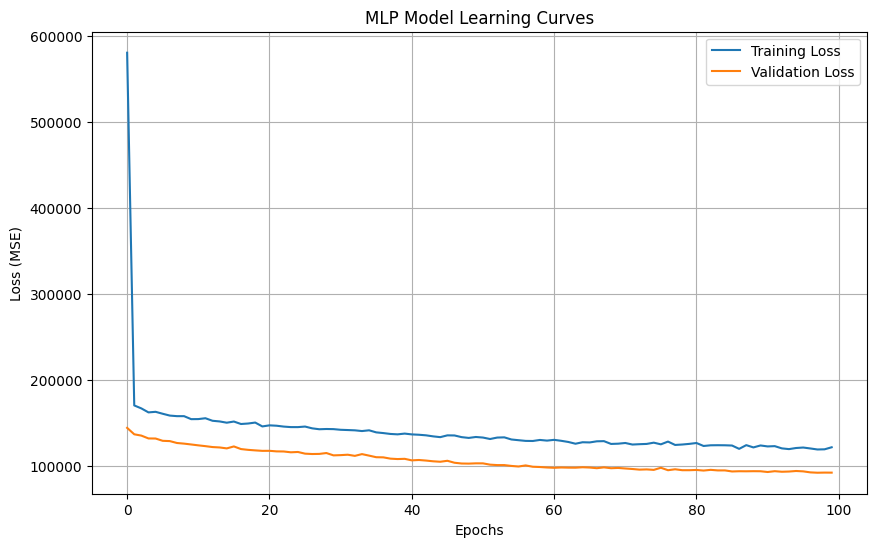

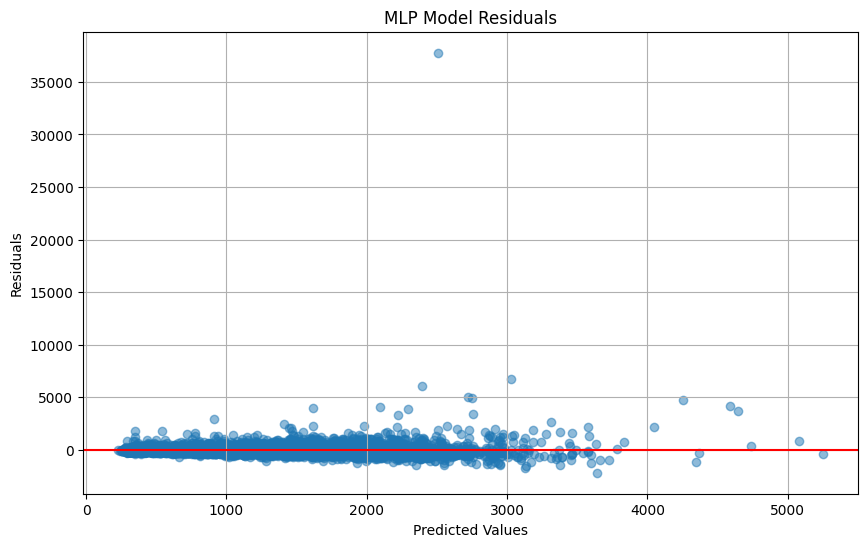

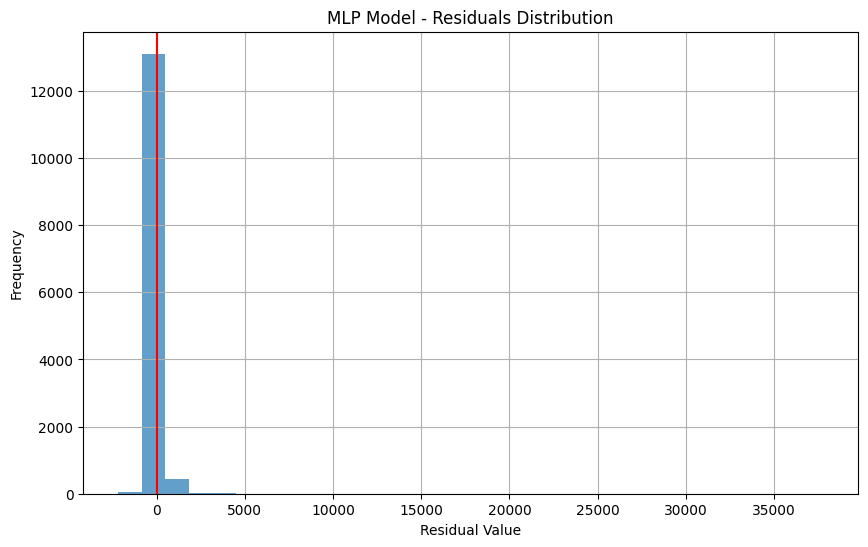

In [53]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Architecture 1: Simple MLP
def create_mlp_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Train and evaluate MLP model
print("\n--- Neural Network: Simple MLP Architecture ---")
mlp_model = create_mlp_model(X_train_std.shape[1])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
mlp_history = mlp_model.fit(
    X_train_std, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Predict and evaluate
y_train_pred_mlp = mlp_model.predict(X_train_std).flatten()
y_test_pred_mlp = mlp_model.predict(X_test_std).flatten()

# Calculate metrics
train_mse_mlp = mean_squared_error(y_train, y_train_pred_mlp)
test_mse_mlp = mean_squared_error(y_test, y_test_pred_mlp)
train_rmse_mlp = np.sqrt(train_mse_mlp)
test_rmse_mlp = np.sqrt(test_mse_mlp)
train_mae_mlp = mean_absolute_error(y_train, y_train_pred_mlp)
test_mae_mlp = mean_absolute_error(y_test, y_test_pred_mlp)
train_r2_mlp = r2_score(y_train, y_train_pred_mlp)
test_r2_mlp = r2_score(y_test, y_test_pred_mlp)

print("\nMLP Neural Network Performance:")
print(f"Train MSE: {train_mse_mlp:.2f}, Test MSE: {test_mse_mlp:.2f}")
print(f"Train RMSE: {train_rmse_mlp:.2f}, Test RMSE: {test_rmse_mlp:.2f}")
print(f"Train MAE: {train_mae_mlp:.2f}, Test MAE: {test_mae_mlp:.2f}")
print(f"Train R¬≤: {train_r2_mlp:.4f}, Test R¬≤: {test_r2_mlp:.4f}")

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot MLP residuals
plt.figure(figsize=(10, 6))
residuals_mlp = y_test - y_test_pred_mlp
plt.scatter(y_test_pred_mlp, residuals_mlp, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('MLP Model Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot residual distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals_mlp, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='-')
plt.title('MLP Model - Residuals Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Model: "functional_9"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_17      ‚îÇ (None, 1)         ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ input_layer_16      ‚îÇ (None, 20)        ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding_7         ‚îÇ (None, 1, 10)     ‚îÇ      4,100 ‚îÇ input_layer_17[0‚Ä¶ ‚îÇ
‚îÇ (Embedding)         ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_43 (Dense)    ‚îÇ (None, 32)        ‚îÇ        672 ‚îÇ input_layer_16[0‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_7 (Flatten) ‚îÇ (None, 10)        ‚îÇ          0 ‚îÇ embedding_7[0][0] ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate_7       ‚îÇ (None, 42)        ‚îÇ          0 ‚îÇ dense_43[0][0],   ‚îÇ
‚îÇ (Concatenate)       ‚îÇ                   ‚îÇ            ‚îÇ flatten_7[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_44 (Dense)    ‚îÇ (None, 64)        ‚îÇ      2,752 ‚îÇ concatenate_7[0]‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_18          ‚îÇ (None, 64)        ‚îÇ          0 ‚îÇ dense_44[0][0]    ‚îÇ
‚îÇ (Dropout)           ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_45 (Dense)    ‚îÇ (None, 32)        ‚îÇ      2,080 ‚îÇ dropout_18[0][0]  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_19          ‚îÇ (None, 32)        ‚îÇ          0 ‚îÇ dense_45[0][0]    ‚îÇ
‚îÇ (Dropout)           ‚îÇ                   ‚îÇ            ‚îÇ                   

 Total params: 10,149 (39.64 KB)

 Trainable params: 10,149 (39.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 540us/step - loss: 1558883.2500 - val_loss: 895582.5000
Epoch 2/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 469us/step - loss: 718937.2500 - val_loss: 477890.7500
Epoch 3/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 479us/step - loss: 334346.7812 - val_loss: 164583.3281
Epoch 4/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 468us/step - loss: 191637.5469 - val_loss: 114097.9766
Epoch 5/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 471us/step - loss: 135459.6250 - val_loss: 94549.8828
Epoch 6/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 494us/step - loss: 109574.2656 - val_loss: 87374.8828
Epoch 7/100
795/795 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 468us/step - loss: 108987.0781 - val_loss: 82159.9219
Epoch 8/100
795/795 ‚îÅ‚îÅ‚îÅ

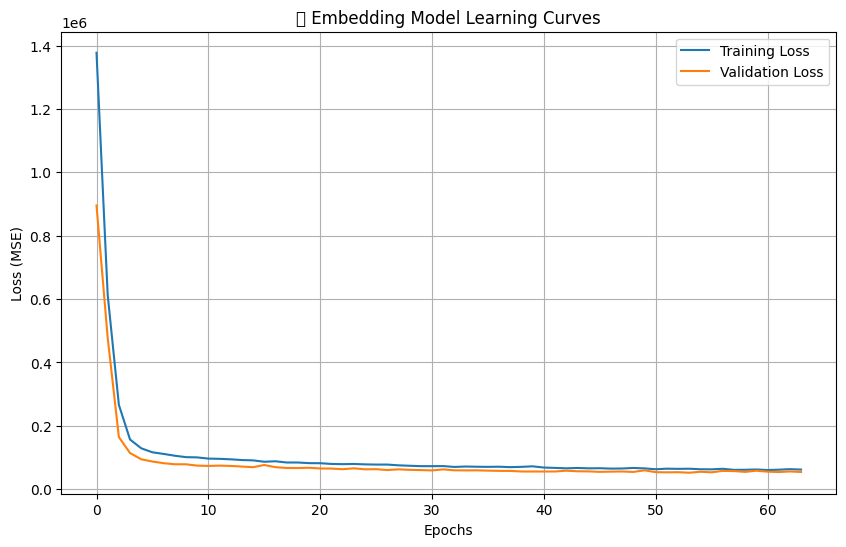

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, Concatenate, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# ‚úÖ ◊ß◊ë◊ô◊¢◊™ ◊û◊°◊§◊® ◊ë◊™◊ô ◊î◊û◊ú◊ï◊ü ◊¢◊ú ◊§◊ô ◊î◊¢◊®◊ö ◊î◊û◊ß◊°◊ô◊û◊ú◊ô ◊ë◊¢◊û◊ï◊ì◊î `hotel_name_encoded`
num_hotels = X_train["hotel_name_encoded"].max() + 1  # ◊ú◊ï◊ï◊ì◊ê ◊©◊ê◊ô◊ü ◊ó◊®◊ô◊í◊î

# ‚úÖ ◊ß◊ú◊ò◊ô ◊î-ID ◊©◊ú ◊î◊û◊ú◊ï◊ü
X_train_hotel_id = X_train["hotel_name_encoded"].values
X_test_hotel_id = X_test["hotel_name_encoded"].values

# ‚úÖ ◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊ú◊ê ◊®◊ú◊ï◊ï◊†◊ò◊ô◊ï◊™ (◊ï◊ï◊ô◊ì◊ï◊ê ◊©◊î◊ü ◊ß◊ô◊ô◊û◊ï◊™ ◊ú◊§◊†◊ô ◊î◊û◊ó◊ô◊ß◊î)
cols_to_drop = {"hotel_name", "hotel_name_encoded"} & set(X_train.columns)
X_train_numeric = X_train.drop(columns=cols_to_drop, errors="ignore").values
X_test_numeric = X_test.drop(columns=cols_to_drop, errors="ignore").values

# ‚úÖ ◊†◊®◊û◊ï◊ú ◊î◊†◊™◊ï◊†◊ô◊ù
scaler_emb = StandardScaler()
X_train_numeric_scaled = scaler_emb.fit_transform(X_train_numeric)
X_test_numeric_scaled = scaler_emb.transform(X_test_numeric)

# ‚úÖ ◊ë◊†◊ô◊ô◊™ ◊î◊û◊ï◊ì◊ú ◊¢◊ù embedding
def create_embedding_model(numeric_input_dim, num_hotels):
    # üî¢ ◊ß◊ú◊ò ◊ú◊§◊ô◊¶'◊®◊ô◊ù ◊û◊°◊§◊®◊ô◊ô◊ù
    numerical_input = Input(shape=(numeric_input_dim,))
    numeric_dense = Dense(32, activation='relu')(numerical_input)
    
    # üè® ◊ß◊ú◊ò ◊ú-ID ◊©◊ú ◊î◊û◊ú◊ï◊ü ◊¢◊ù embedding
    hotel_input = Input(shape=(1,))
    hotel_embedding = Embedding(input_dim=num_hotels, output_dim=10, input_length=1)(hotel_input)  
    hotel_flatten = Flatten()(hotel_embedding)
    
    # üîó ◊©◊ô◊ú◊ï◊ë ◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊û◊°◊§◊®◊ô◊ô◊ù ◊¢◊ù ◊î-embedding ◊©◊ú ◊î◊û◊ú◊ï◊ü
    combined = Concatenate()([numeric_dense, hotel_flatten])
    
    # üîÑ ◊©◊õ◊ë◊ï◊™ Fully Connected
    x = Dense(64, activation='tanh')(combined)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='sigmoid')(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    output = Dense(1)(x)
    
    # ◊ô◊¶◊ô◊®◊™ ◊î◊û◊ï◊ì◊ú
    model = Model(inputs=[numerical_input, hotel_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# üîÑ **◊ê◊ô◊û◊ï◊ü ◊î◊û◊ï◊ì◊ú**
embedding_model = create_embedding_model(X_train_numeric_scaled.shape[1], num_hotels)

# üìú ◊î◊ì◊§◊°◊™ ◊û◊ë◊†◊î ◊î◊û◊ï◊ì◊ú
embedding_model.summary()

# ‚è≥ ◊î◊í◊ì◊®◊™ ◊¢◊¶◊ô◊®◊î ◊û◊ï◊ß◊ì◊û◊™
early_stopping_emb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# üèãÔ∏è **◊ê◊ô◊û◊ï◊ü ◊î◊û◊ï◊ì◊ú**
emb_history = embedding_model.fit(
    [X_train_numeric_scaled, X_train_hotel_id.reshape(-1, 1)], 
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping_emb],
    verbose=1
)

# üîÆ **◊†◊ô◊ë◊ï◊ô ◊ï◊ë◊ô◊¶◊ï◊¢◊ô ◊î◊û◊ï◊ì◊ú**
y_train_pred_emb = embedding_model.predict([X_train_numeric_scaled, X_train_hotel_id.reshape(-1, 1)]).flatten()
y_test_pred_emb = embedding_model.predict([X_test_numeric_scaled, X_test_hotel_id.reshape(-1, 1)]).flatten()

# üèÜ **◊ó◊ô◊©◊ï◊ë ◊û◊ì◊ì◊ô◊ù**
train_mse_emb = mean_squared_error(y_train, y_train_pred_emb)
test_mse_emb = mean_squared_error(y_test, y_test_pred_emb)
train_rmse_emb = np.sqrt(train_mse_emb)
test_rmse_emb = np.sqrt(test_mse_emb)
train_mae_emb = mean_absolute_error(y_train, y_train_pred_emb)
test_mae_emb = mean_absolute_error(y_test, y_test_pred_emb)
train_r2_emb = r2_score(y_train, y_train_pred_emb)
test_r2_emb = r2_score(y_test, y_test_pred_emb)

print("\nüìä **◊ë◊ô◊¶◊ï◊¢◊ô ◊®◊©◊™ ◊†◊ï◊ô◊®◊ï◊†◊ô◊ù ◊¢◊ù Embedding:**")
print(f"Train MSE: {train_mse_emb:.2f}, Test MSE: {test_mse_emb:.2f}")
print(f"Train RMSE: {train_rmse_emb:.2f}, Test RMSE: {test_rmse_emb:.2f}")
print(f"Train MAE: {train_mae_emb:.2f}, Test MAE: {test_mae_emb:.2f}")
print(f"Train R¬≤: {train_r2_emb:.4f}, Test R¬≤: {test_r2_emb:.4f}")

# üìà **◊©◊®◊ò◊ï◊ò ◊¢◊ß◊ï◊û◊™ ◊ú◊û◊ô◊ì◊î**
plt.figure(figsize=(10, 6))
plt.plot(emb_history.history['loss'], label='Training Loss')
plt.plot(emb_history.history['val_loss'], label='Validation Loss')
plt.title('üìä Embedding Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


TTT-Based Split:
Train set (TTT >= 25): 13300 samples (29.3%)
Test set (TTT < 25): 32100 samples (70.7%)

TTT-based training set size: (13300, 23)
TTT-based test set size: (32100, 23)


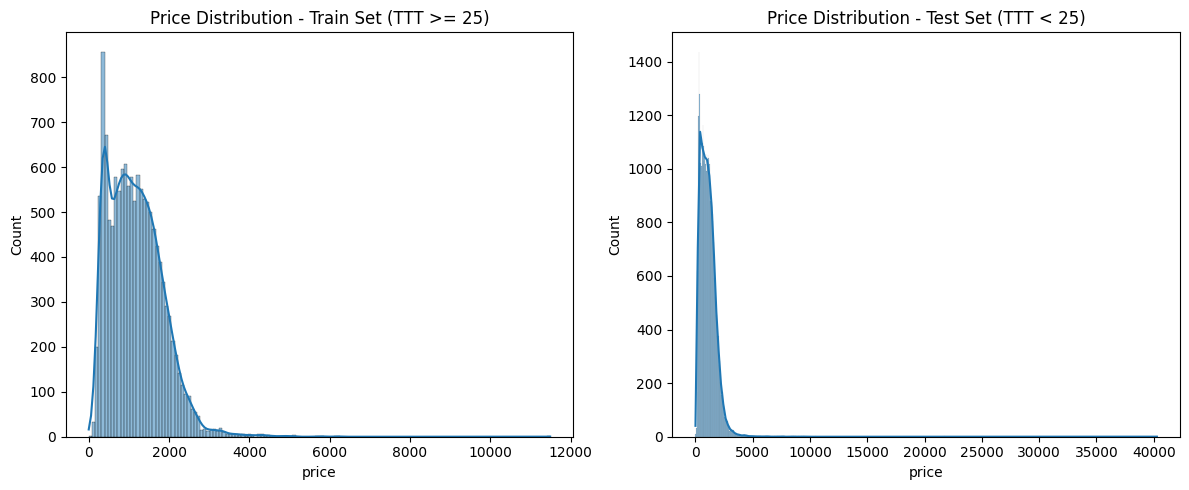


--- Gradient Boosting Regressor with TTT-based split ---


In [ ]:
# Time-Based Train-Test Split for Gradient Boosting
# Train: TTT >= 25 days, Test: TTT < 25 days

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Function to evaluate model with TTT-based split
def evaluate_model_ttt_split(model, X_train, X_test, y_train, y_test, model_name="Model"):
    # Train and predict
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"\n{model_name} Performance with TTT-based split:")
    print(f"Train set (TTT >= 25) MSE: {train_mse:.2f}, Test set (TTT < 25) MSE: {test_mse:.2f}")
    print(f"Train set (TTT >= 25) RMSE: {train_rmse:.2f}, Test set (TTT < 25) RMSE: {test_rmse:.2f}")
    print(f"Train set (TTT >= 25) MAE: {train_mae:.2f}, Test set (TTT < 25) MAE: {test_mae:.2f}")
    print(f"Train set (TTT >= 25) R¬≤: {train_r2:.4f}, Test set (TTT < 25) R¬≤: {test_r2:.4f}")
    
    # Plot residuals
    plt.figure(figsize=(12, 5))
    
    # Training residuals
    plt.subplot(1, 2, 1)
    residuals_train = y_train - y_train_pred
    plt.scatter(y_train_pred, residuals_train, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Training Residuals (TTT >= 25)')
    
    # Test residuals
    plt.subplot(1, 2, 2)
    residuals_test = y_test - y_test_pred
    plt.scatter(y_test_pred, residuals_test, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Test Residuals (TTT < 25)')
    
    plt.tight_layout()
    plt.show()
    
    # Plot a residual histogram
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(residuals_train, bins=30, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='-')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} - Training Residuals Distribution')
    
    plt.subplot(1, 2, 2)
    plt.hist(residuals_test, bins=30, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='-')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} - Test Residuals Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Plot actual vs predicted values
    plt.figure(figsize=(12, 5))
    
    # Training data
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name} - Training Predictions (TTT >= 25)')
    
    # Test data
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name} - Test Predictions (TTT < 25)')
    
    plt.tight_layout()
    plt.show()
    
    # Return metrics
    return {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_test_pred': y_test_pred
    }

# Create TTT-based split
# Train: TTT >= 25, Test: TTT < 25
mask_train = df['ttt'] >= 25
mask_test = df['ttt'] < 25

# Check the size of each split
train_size = sum(mask_train)
test_size = sum(mask_test)
print(f"TTT-Based Split:")
print(f"Train set (TTT >= 25): {train_size} samples ({100*train_size/len(df):.1f}%)")
print(f"Test set (TTT < 25): {test_size} samples ({100*test_size/len(df):.1f}%)")

# Create feature and target for the new split
X = df.drop(['price', 'snapshot', 'checkin', 'checkout'], axis=1)
y = df['price']

# Convert any remaining object columns to numeric if needed
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
    
# Fill any NaN values created by conversion
X = X.fillna(-1)

# Create the split
X_train_ttt = X[mask_train]
X_test_ttt = X[mask_test]
y_train_ttt = y[mask_train]
y_test_ttt = y[mask_test]

print(f"\nTTT-based training set size: {X_train_ttt.shape}")
print(f"TTT-based test set size: {X_test_ttt.shape}")

# Analyze distribution of prices in both sets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_train_ttt, kde=True)
plt.title('Price Distribution - Train Set (TTT >= 25)')
plt.xlabel('price')

plt.subplot(1, 2, 2)
sns.histplot(y_test_ttt, kde=True)
plt.title('Price Distribution - Test Set (TTT < 25)')
plt.xlabel('price')

plt.tight_layout()
plt.show()

# Train Gradient Boosting with TTT-based split
print("\n--- Gradient Boosting Regressor with TTT-based split ---")
gpr_model_ttt = GaussianProcessRegressor(
        kernel=(RBF(length_scale=1.0) * ConstantKernel(1.0) + WhiteKernel(noise_level=0.1)), 
        n_restarts_optimizer=5, 
        normalize_y=True,  
        random_state=42
    )
gb_results_ttt = evaluate_model_ttt_split(gpr_model_ttt, X_train_ttt, X_test_ttt, y_train_ttt, y_test_ttt, 
                                         "GaussianProcessRegressor")

# Print summary of results
print("\n--- Summary: Gradient Boosting with TTT-based Split ---")
print(f"Test R¬≤: {gb_results_ttt['test_r2']:.4f}")
print(f"Test RMSE: {gb_results_ttt['test_rmse']:.2f}")
print(f"Test MAE: {gb_results_ttt['test_mae']:.2f}")